In [3]:
import pandas as pd
import json

In [5]:
# Load the CSV file into a DataFrame
file_path = "littlewestcafe.csv"
try:
    data = pd.read_csv(file_path)
    print("CSV file loaded successfully!")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit()

CSV file loaded successfully!


In [6]:
# Remove rows where 'last_4_digit' is null (NaN)
data = data.dropna(subset=['last_4_digit'])

In [7]:
# Check unique values for each column
print("\n--- Unique Values Per Column ---")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")


--- Unique Values Per Column ---
id: 8334 unique values
brand_id: 1 unique values
external_data: 8334 unique values
paid_amount: 1247 unique values
transacted_at: 8334 unique values
last_4_digit: 3340 unique values
card_type: 27 unique values


In [8]:
# Create 'customer_id' from 'last_4_digit' and 'card_type'
data['customer_id'] = data.groupby(['last_4_digit', 'card_type']).ngroup()

# Display the updated DataFrame with the new 'customer_id' column
print(data[['id', 'last_4_digit', 'card_type', 'customer_id']].head())


       id  last_4_digit             card_type  customer_id
0  127023        3274.0  eftpos_australia_chq         1312
1   13383        5398.0  eftpos_australia_sav         2178
2  129394        5516.0       mcstandarddebit         2227
3  110779        5933.0  eftpos_australia_chq         2385
4  104196        6102.0  mcsuperpremiumcredit         2457


In [9]:
# Check unique values for each column
print("\n--- Unique Values Per Column ---")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")


--- Unique Values Per Column ---
id: 8334 unique values
brand_id: 1 unique values
external_data: 8334 unique values
paid_amount: 1247 unique values
transacted_at: 8334 unique values
last_4_digit: 3340 unique values
card_type: 27 unique values
customer_id: 3955 unique values


In [11]:
def extract_product_details(external_data, order_id):
    try:
        # Parse the external_data as JSON
        external_data_dict = json.loads(external_data)
        
        # Prepare a list to store the product details for this order
        product_details = []
        
        # Extract product details from the 'lines' section
        for line in external_data_dict.get('lines', []):
            product_name = line.get('product', {}).get('name', '')
            quantity = line.get('quantity', 0)
            line_total_tax = line.get('line_total_tax', 0)
            line_total_ex_tax = line.get('line_total_ex_tax', 0)
            
            # Calculate total price per product
            total_price = line_total_tax + line_total_ex_tax
            
            # Add the product details as a tuple to the list
            product_details.append({
                'id': order_id,
                'product_name': product_name,
                'quantity': quantity,
                'total_price': total_price
            })
        
        return product_details
    except Exception as e:
        print(f"Error parsing external_data: {e}")
        return []

In [12]:
# Create an empty list to store all the extracted product details
all_product_details = []

# Iterate over the rows of the original data to extract product details
for index, row in data.iterrows():
    external_data = row['external_data']  # Get the external_data from the current row
    order_id = row['id']  # Get the id from the current row
    
    # Extract product details and append them to the list
    product_details = extract_product_details(external_data, order_id)
    all_product_details.extend(product_details)

# Create a new DataFrame from the extracted product details
product_df = pd.DataFrame(all_product_details)

# Display the new dataframe
print(product_df.head())

       id                     product_name  quantity  total_price
0  127023                          Piccolo         1          4.8
1  127023                          Piccolo         1          4.8
2  127023                        LW Cookie         1          6.0
3   13383  Roasted Tomato & Relish Toastie         2         30.0
4   13383               Flat White - Small         2          9.6


/var/folders/62/_fzs_d452mv3jyvpgg6zsmn00000gn/T/ipykernel_50758/2162626803.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_visit_counts.index, y=customer_visit_counts.values, palette="viridis")


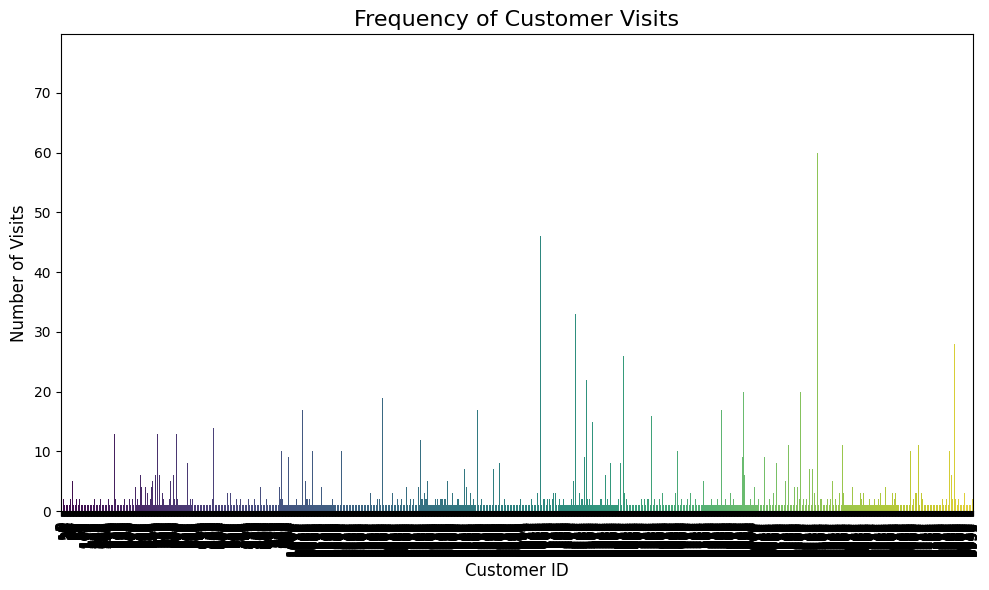

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each customer_id
customer_visit_counts = data['customer_id'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_visit_counts.index, y=customer_visit_counts.values, palette="viridis")

# Adding labels and title
plt.title('Frequency of Customer Visits', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

# Display the plot
plt.tight_layout()
plt.show()


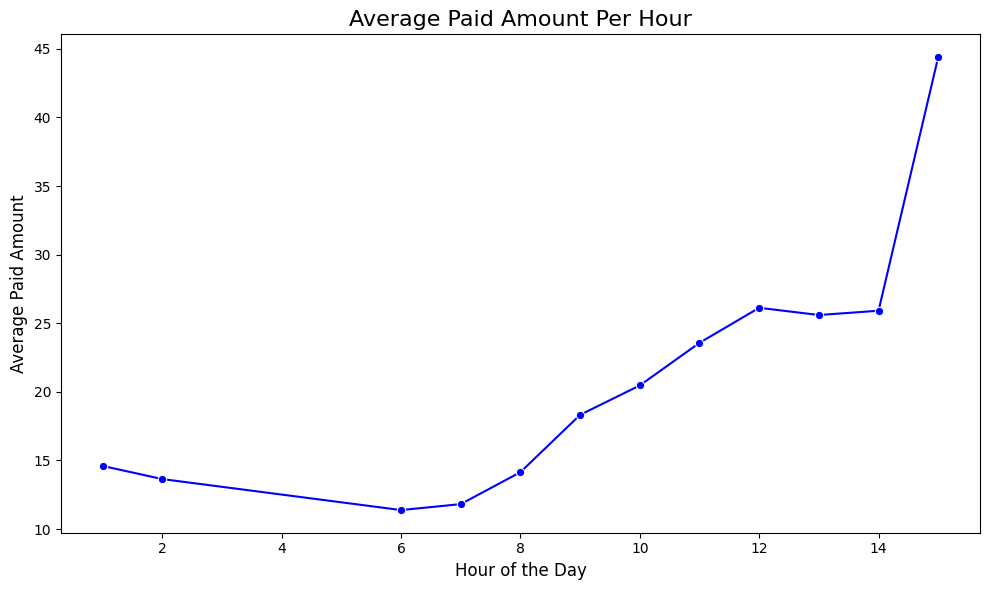

In [14]:

# Ensure transacted_at is in datetime format
data['transacted_at'] = pd.to_datetime(data['transacted_at'], utc=True)
data['transacted_at'] = data['transacted_at'].dt.tz_convert('Australia/Sydney')

# Extract the hour from the transacted_at column
data['hour'] = data['transacted_at'].dt.hour

# Calculate the average paid_amount per hour
hourly_avg_paid = data.groupby('hour')['paid_amount'].mean()

# Create a line plot to visualize average paid_amount per hour
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg_paid.index, y=hourly_avg_paid.values, marker='o', color='b')

# Adding labels and title
plt.title('Average Paid Amount Per Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Paid Amount', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


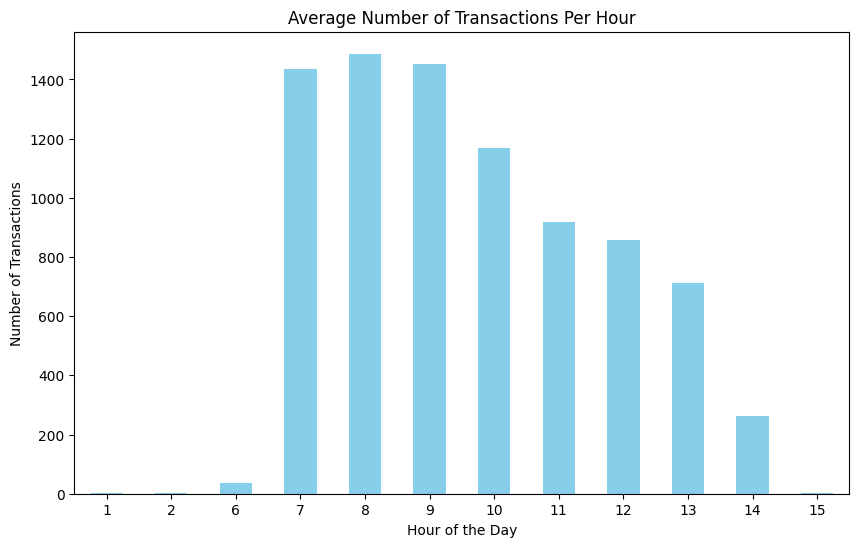

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'transacted_at' column is in datetime format
data['transacted_at'] = pd.to_datetime(data['transacted_at'], utc=True)
data['transacted_at'] = data['transacted_at'].dt.tz_convert('Australia/Sydney')

# Extract the hour from 'transacted_at' and create a new column 'hour'
data['hour'] = data['transacted_at'].dt.hour

# Group by the hour and count the number of transactions per hour
transactions_per_hour = data.groupby('hour').size()

# Plotting the average number of transactions per hour
plt.figure(figsize=(10, 6))
transactions_per_hour.plot(kind='bar', color='skyblue')
plt.title('Average Number of Transactions Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()


In [17]:
# Ensure the 'transacted_at' column is in datetime format
data['transacted_at'] = pd.to_datetime(data['transacted_at'], utc=True)
data['transacted_at'] = data['transacted_at'].dt.tz_convert('Australia/Sydney')

# Find the minimum and maximum dates
min_date = data['transacted_at'].min()
max_date = data['transacted_at'].max()

# Print the date range
print(f"Date range of the dataset: {min_date} to {max_date}")


Date range of the dataset: 2024-02-22 07:25:01+11:00 to 2024-12-05 12:56:23+11:00


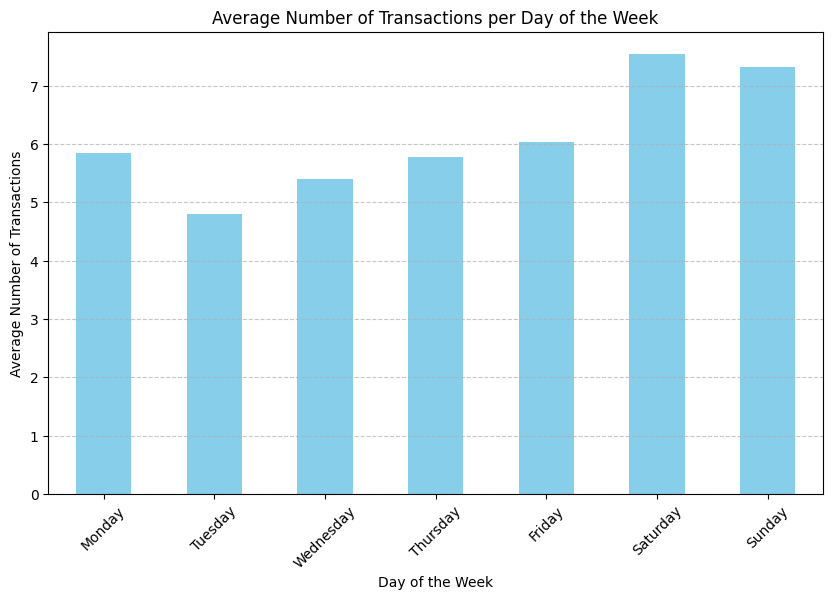

In [18]:
# Extract the day of the week from the 'transacted_at' column
data['day_of_week'] = data['transacted_at'].dt.day_name()

# Calculate the number of transactions for each day
transactions_per_day = data.groupby('day_of_week').size()

# Calculate the average number of transactions per day
average_transactions = transactions_per_day / data['transacted_at'].dt.date.nunique()

# Sort days of the week for proper visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_transactions = average_transactions.reindex(days_order)

# Plot the graph
plt.figure(figsize=(10, 6))
average_transactions.plot(kind='bar', color='skyblue')
plt.title('Average Number of Transactions per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

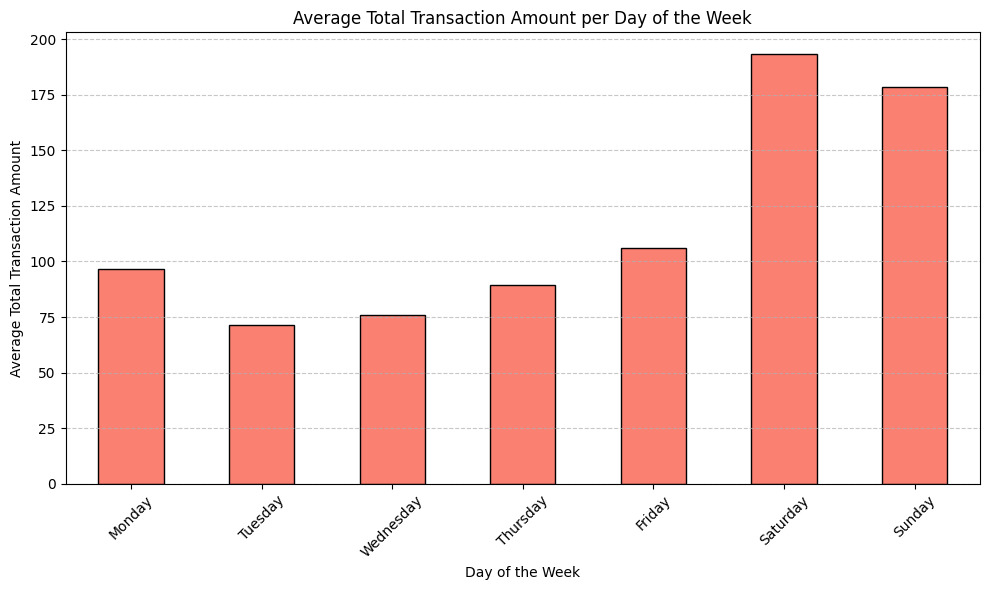

In [20]:
import matplotlib.pyplot as plt

# Extract the day of the week from the 'transacted_at' column
data['day_of_week'] = data['transacted_at'].dt.day_name()

# Calculate the total transaction amount for each day of the week
total_amount_per_day = data.groupby('day_of_week')['paid_amount'].sum()

# Calculate the number of unique days in the dataset
unique_dates = data['transacted_at'].dt.date.nunique()

# Calculate the average total transaction amount per day of the week
average_transaction_amount = total_amount_per_day / unique_dates

# Sort the days of the week for proper visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_transaction_amount = average_transaction_amount.reindex(days_order)

# Plot the graph
plt.figure(figsize=(10, 6))
average_transaction_amount.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Average Total Transaction Amount per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Transaction Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


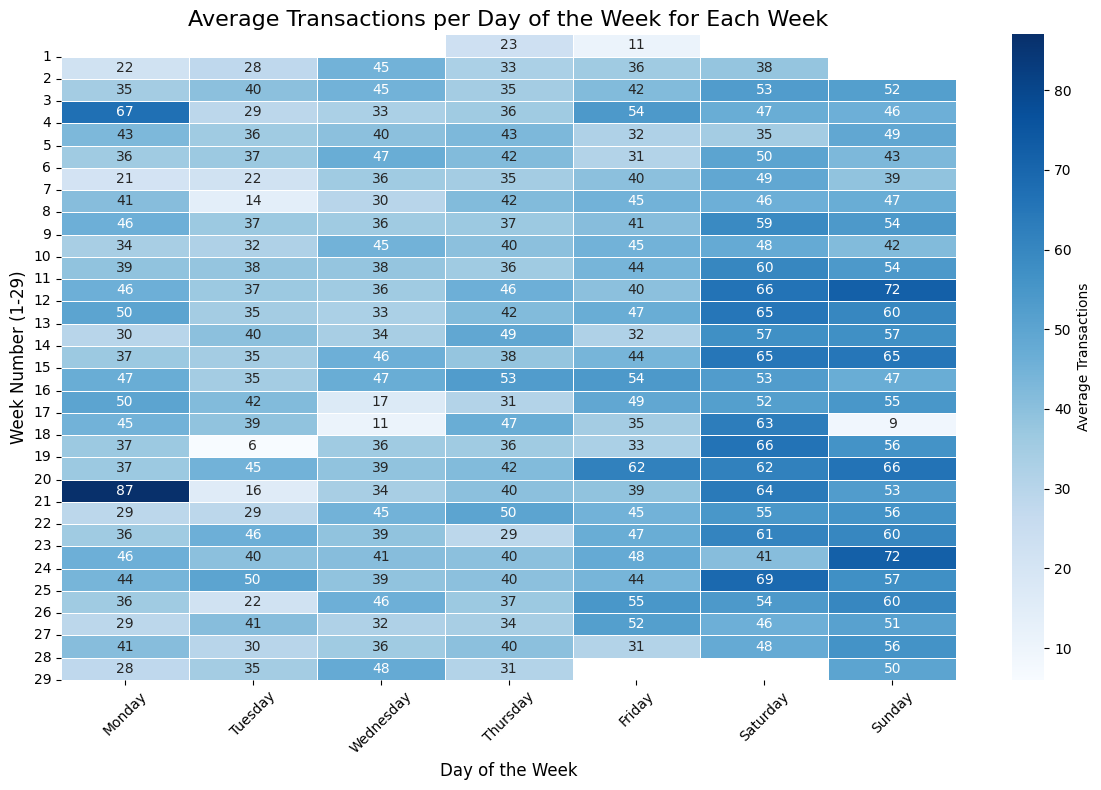

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the 'data' dataframe is already loaded and transacted_at is a datetime column
data['week_number'] = data['transacted_at'].dt.strftime('%Y-%U')  # Year-WeekNumber format
data['day_of_week'] = data['transacted_at'].dt.day_name()  # Extract the day of the week

# Group by week and day of the week to calculate average transactions
weekly_pattern = (
    data.groupby(['week_number', 'day_of_week'])
    .size()
    .reset_index(name='transaction_count')
)

# Convert day_of_week to a categorical type to maintain order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_pattern['day_of_week'] = pd.Categorical(weekly_pattern['day_of_week'], categories=day_order, ordered=True)

# Assign sequential week numbers (1 to 29) for plotting
weekly_pattern['week_number_index'] = weekly_pattern['week_number'].factorize()[0] + 1

# Pivot the data for a heatmap
heatmap_data = weekly_pattern.pivot(index='week_number_index', columns='day_of_week', values='transaction_count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap='Blues',
    linewidths=0.5,
    annot=True,
    fmt='.0f',
    cbar_kws={'label': 'Average Transactions'},
)

# Configure plot aesthetics
plt.title('Average Transactions per Day of the Week for Each Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Week Number (1-29)', fontsize=12)
plt.yticks(ticks=range(1, 30), labels=range(1, 30), rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
import pandas as pd

# Convert 'transacted_at' to datetime if it's not already
data['transacted_at'] = pd.to_datetime(data['transacted_at'])

# Extract the week numbers and year
data['week_of_year'] = data['transacted_at'].dt.isocalendar().week
data['year'] = data['transacted_at'].dt.year

# Calculate unique weeks (combination of year and week number)
unique_weeks = data[['year', 'week_of_year']].drop_duplicates()

# Print the total number of unique weeks
print(f"Number of unique weeks in the dataset: {len(unique_weeks)}")


Number of unique weeks in the dataset: 29


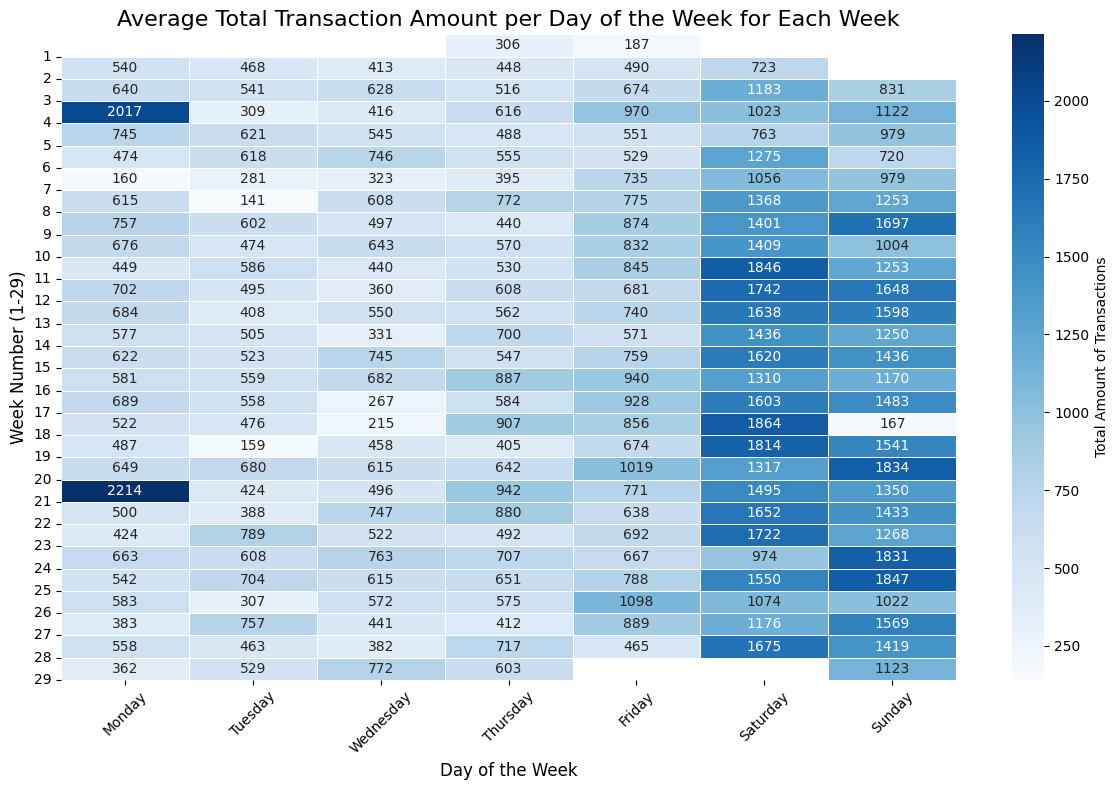

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the 'data' dataframe is already loaded and transacted_at is a datetime column
data['week_number'] = data['transacted_at'].dt.strftime('%Y-%U')  # Year-WeekNumber format
data['day_of_week'] = data['transacted_at'].dt.day_name()  # Extract the day of the week

# Group by week and day of the week to calculate the total amount of transactions
weekly_amount = (
    data.groupby(['week_number', 'day_of_week'])
    .agg(total_amount=('paid_amount', 'sum'))
    .reset_index()
)

# Convert day_of_week to a categorical type to maintain order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_amount['day_of_week'] = pd.Categorical(weekly_amount['day_of_week'], categories=day_order, ordered=True)

# Assign sequential week numbers (1 to 29) for plotting
weekly_amount['week_number_index'] = weekly_amount['week_number'].factorize()[0] + 1

# Pivot the data for a heatmap
heatmap_data = weekly_amount.pivot(index='week_number_index', columns='day_of_week', values='total_amount')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap='Blues',
    linewidths=0.5,
    annot=True,
    fmt='.0f',
    cbar_kws={'label': 'Total Amount of Transactions'},
)

# Configure plot aesthetics
plt.title('Average Total Transaction Amount per Day of the Week for Each Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Week Number (1-29)', fontsize=12)
plt.yticks(ticks=range(1, 30), labels=range(1, 30), rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


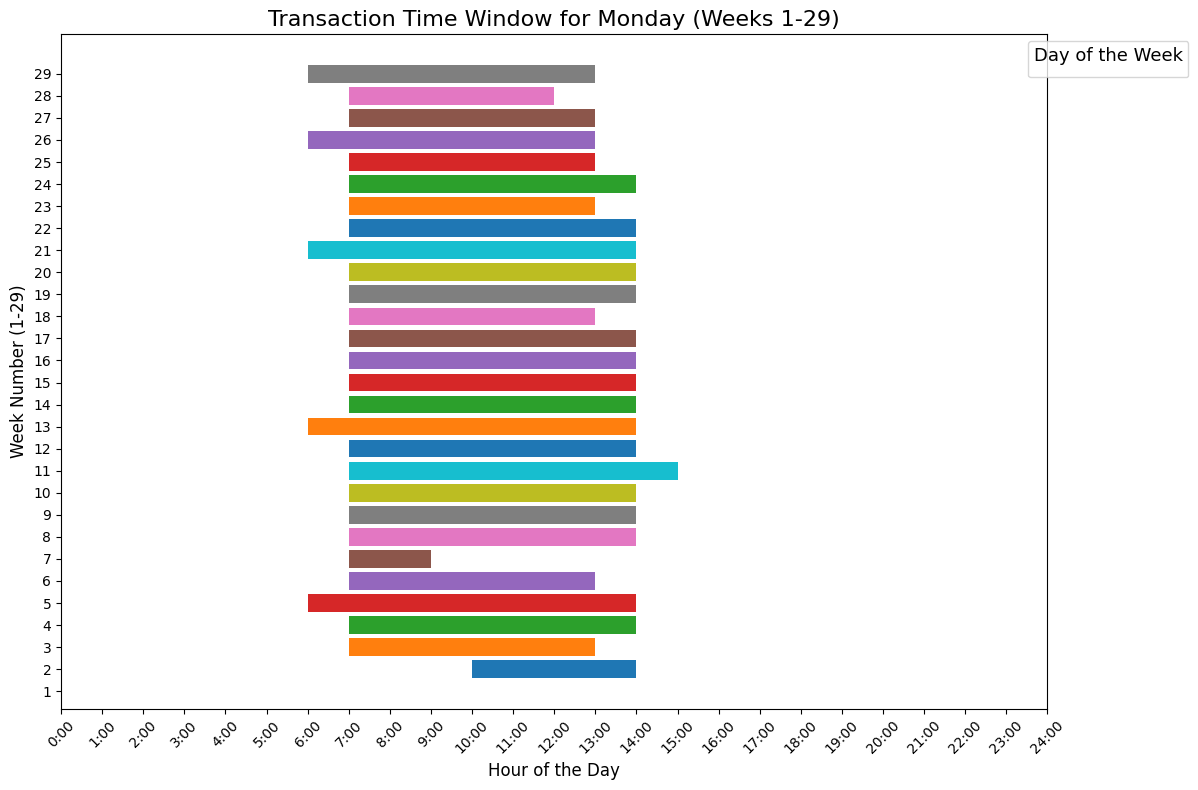

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


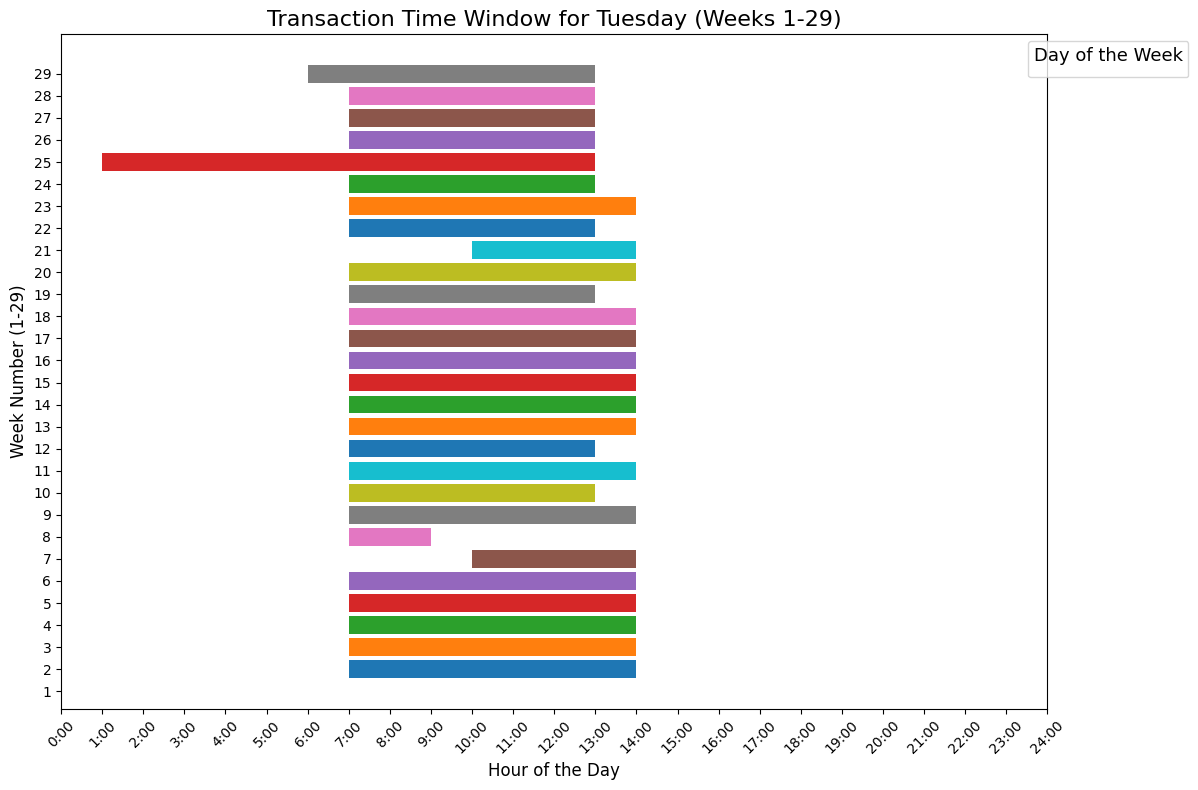

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


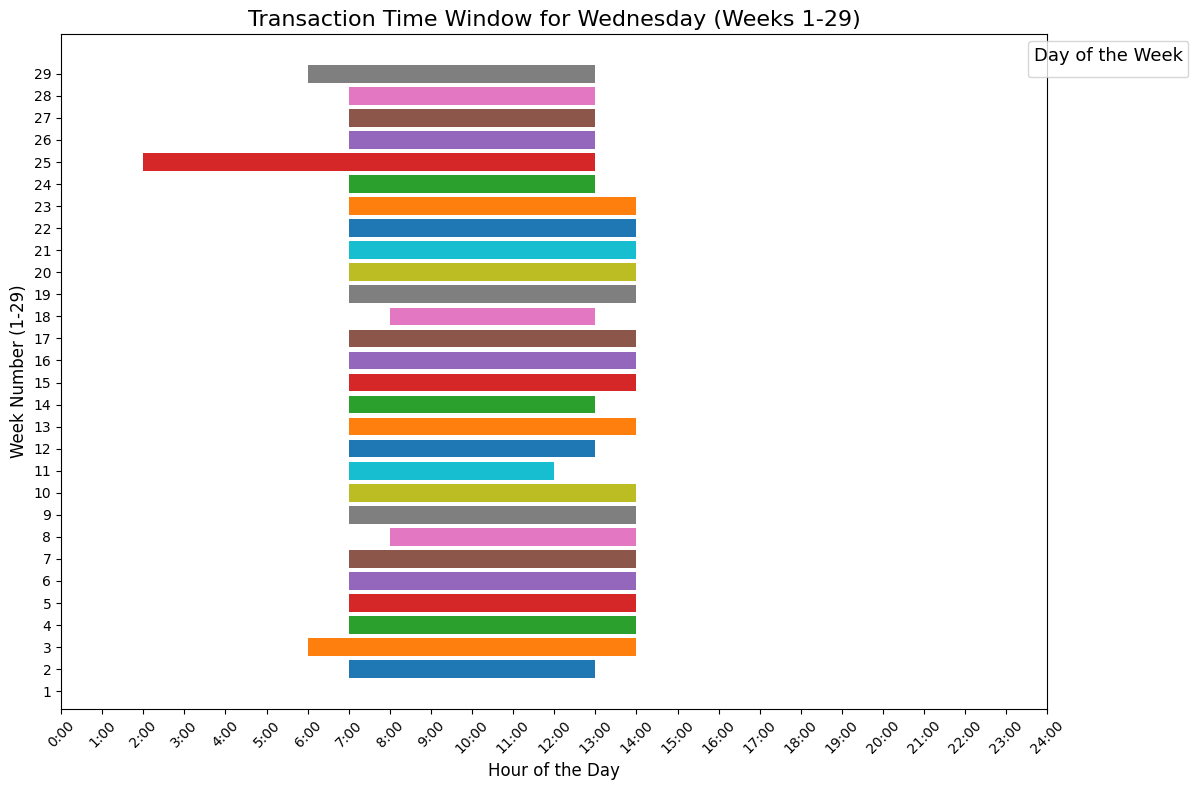

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


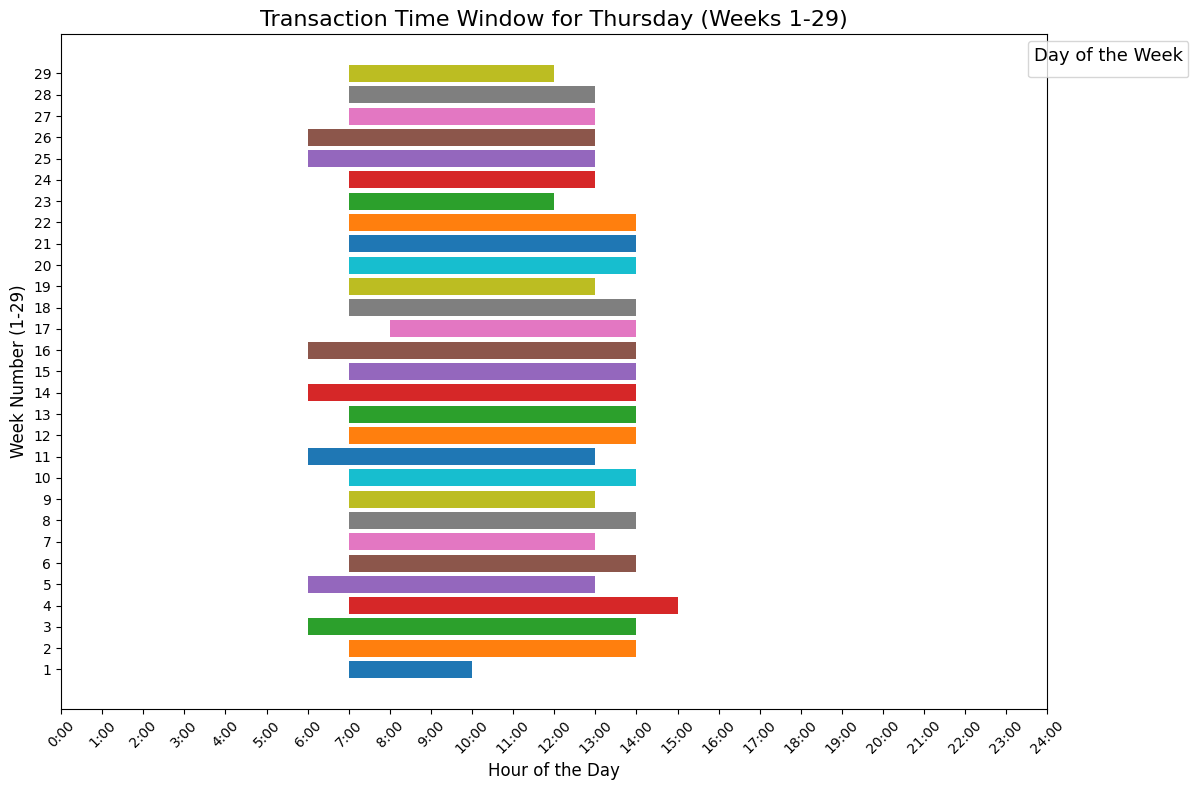

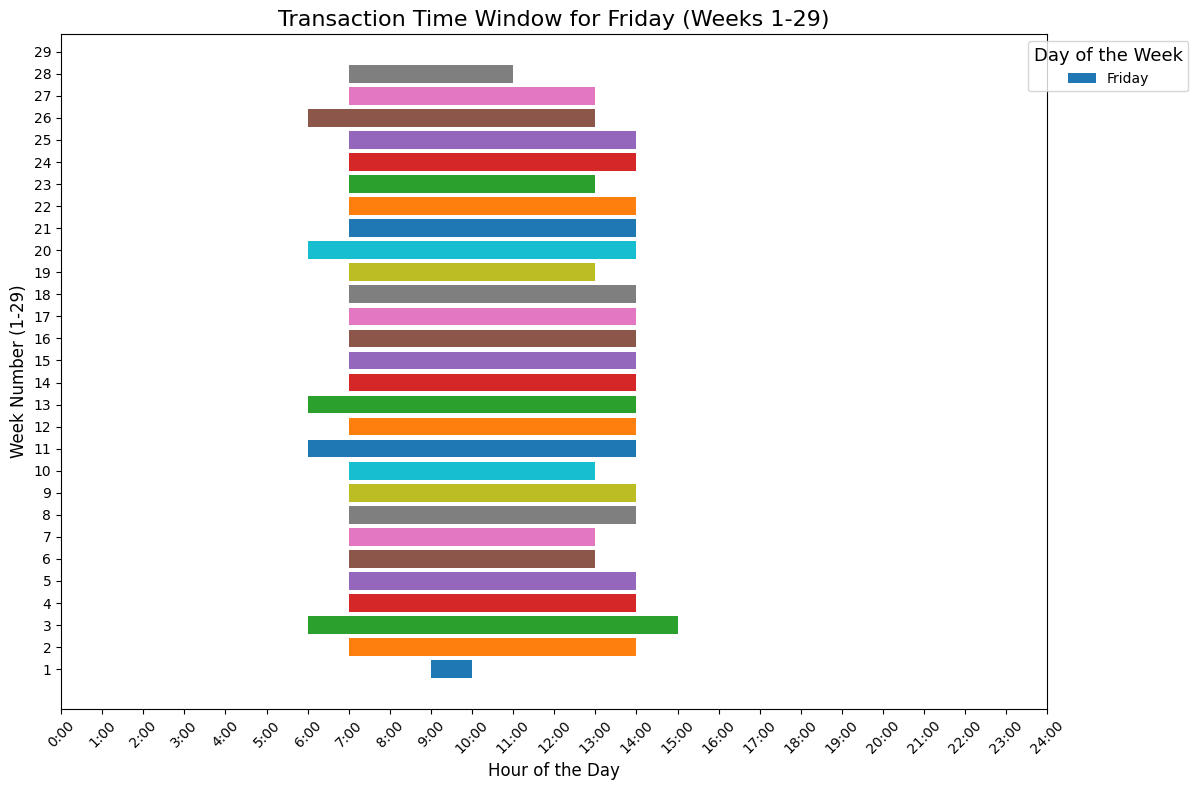

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


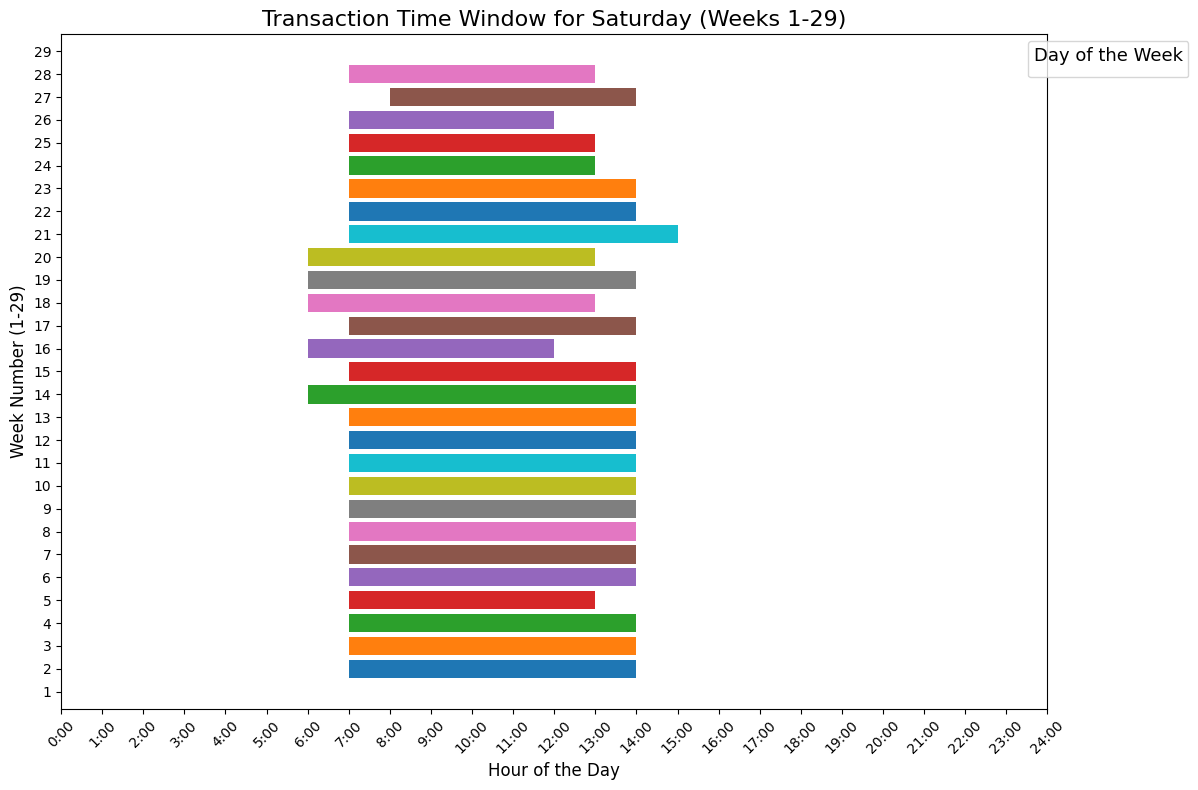

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


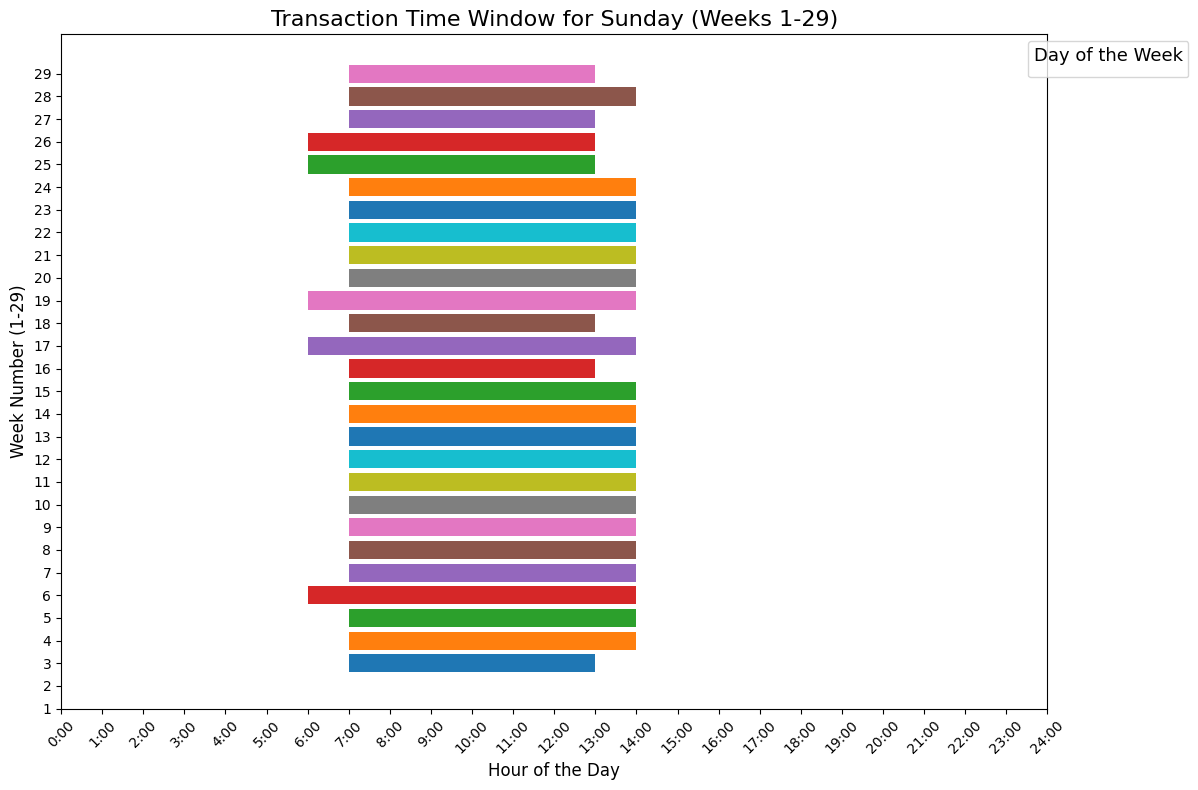

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the 'data' dataframe is already loaded and transacted_at is a datetime column
# Create week_number and day_of_week
data['week_number'] = data['transacted_at'].dt.strftime('%Y-%U')  # Year-WeekNumber format
data['day_of_week'] = data['transacted_at'].dt.day_name()  # Extract the day of the week

# Extract hour of the day from transacted_at
data['hour'] = data['transacted_at'].dt.hour

# Group by week_number and day_of_week to get the start and end transaction hours
weekly_times = data.groupby(['week_number', 'day_of_week']).agg(
    start_hour=('hour', 'min'),
    end_hour=('hour', 'max')
).reset_index()

# Convert day_of_week to a categorical type to maintain order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_times['day_of_week'] = pd.Categorical(weekly_times['day_of_week'], categories=day_order, ordered=True)

# Assign sequential week numbers (1 to 29) for plotting
weekly_times['week_number_index'] = weekly_times['week_number'].factorize()[0] + 1

# Create a list of days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting for each day of the week
for day in days_of_week:
    # Filter data for the specific day
    day_data = weekly_times[weekly_times['day_of_week'] == day]

    # Create a new plot for the day
    plt.figure(figsize=(12, 8))
    
    # Plotting the bar for the transaction window (from start_hour to end_hour)
    for idx, row in day_data.iterrows():
        plt.barh(
            y=row['week_number_index'], 
            left=row['start_hour'], 
            width=row['end_hour'] - row['start_hour'], 
            height=0.8, 
            label=f'{day}' if idx == 0 else ""  # Label only the first bar for the day
        )
    
    # Configure plot aesthetics
    plt.title(f'Transaction Time Window for {day} (Weeks 1-29)', fontsize=16)
    plt.xlabel('Hour of the Day', fontsize=12)
    plt.ylabel('Week Number (1-29)', fontsize=12)
    plt.xticks(ticks=range(0, 25, 1), labels=[f'{i}:00' for i in range(0, 25)], rotation=45)
    plt.yticks(ticks=range(1, 30), labels=range(1, 30))
    plt.legend(title='Day of the Week', title_fontsize='13', loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.tight_layout()

    # Show the plot for the day
    plt.show()


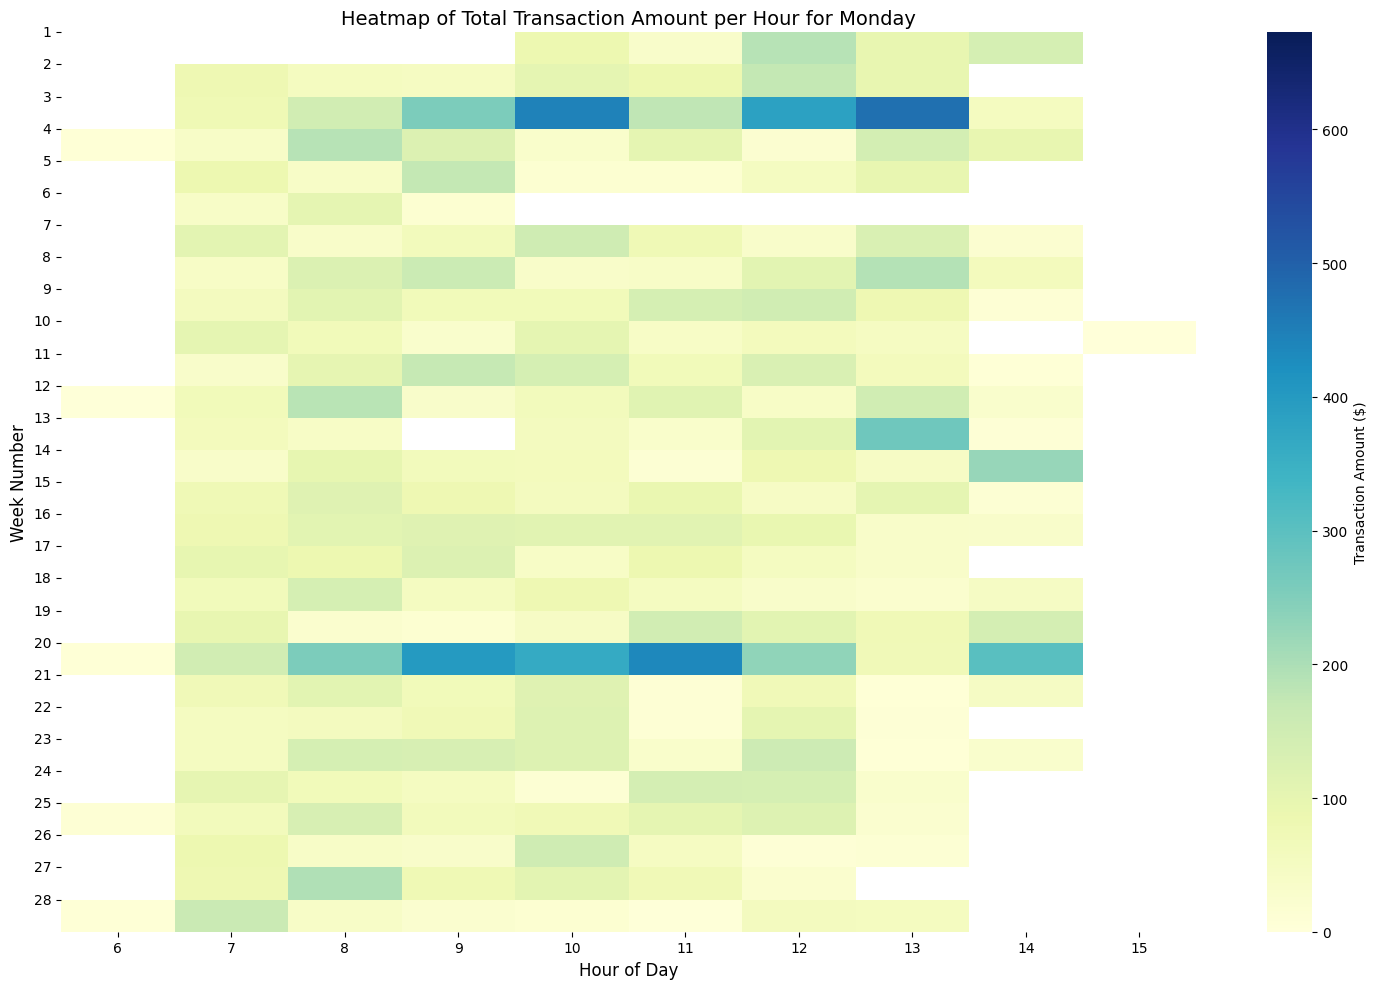

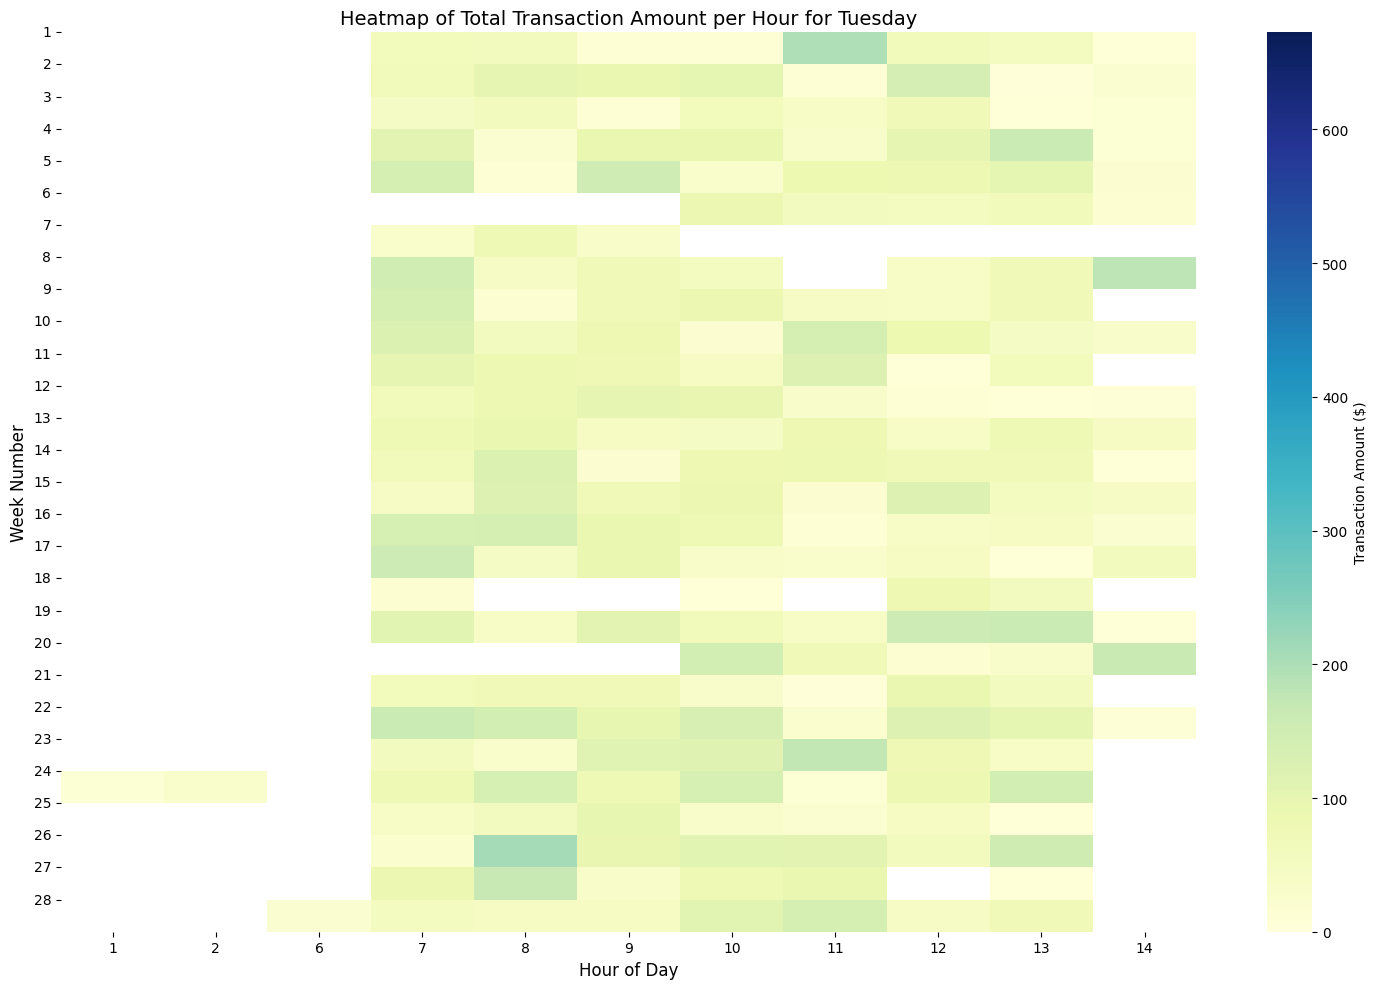

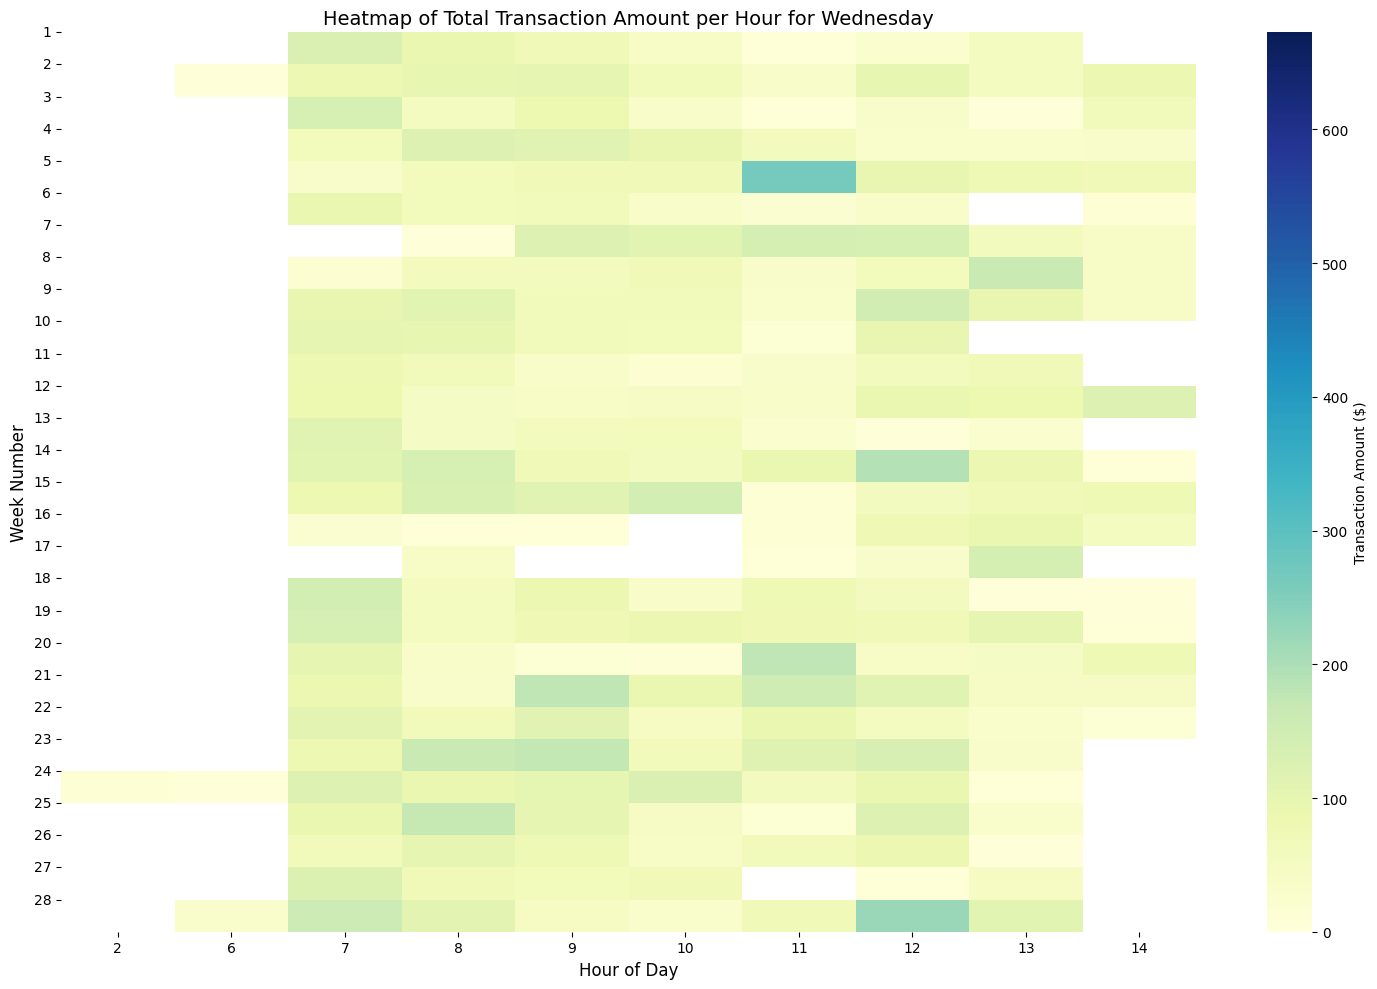

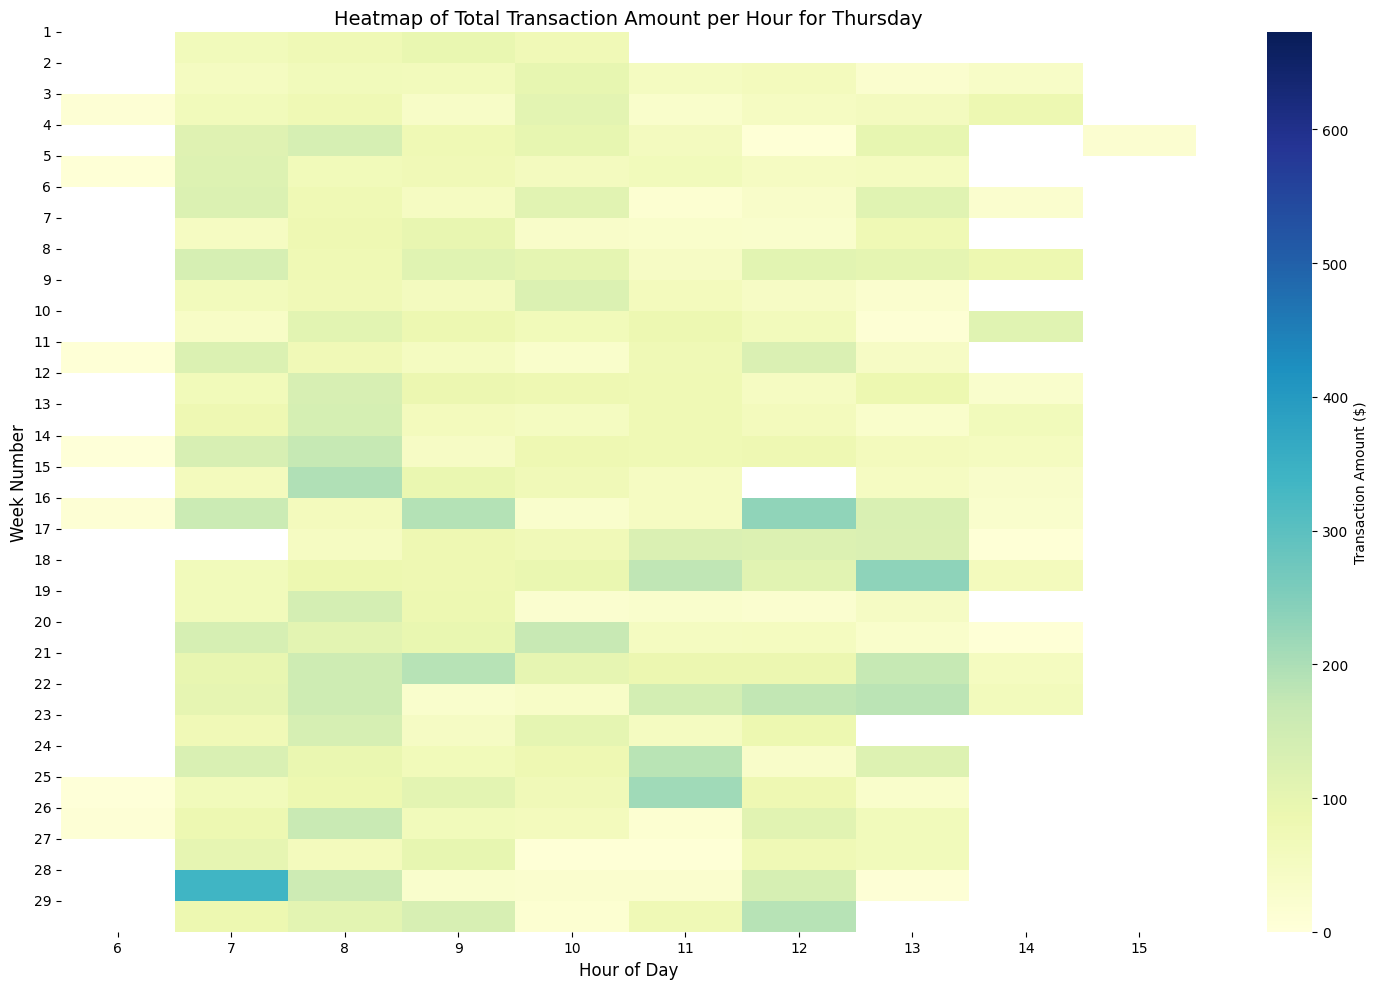

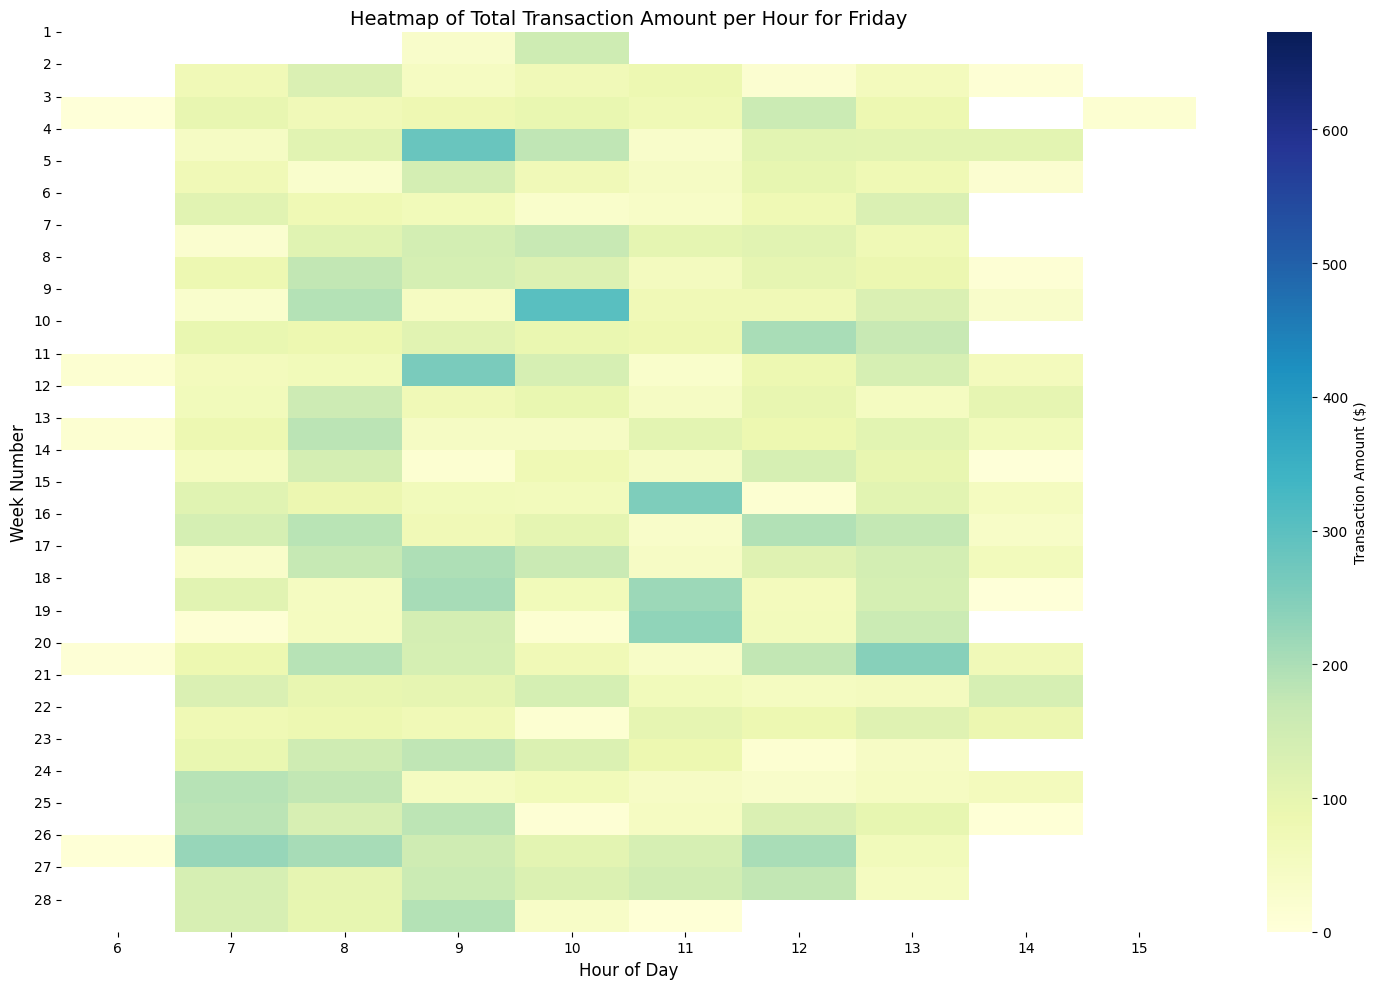

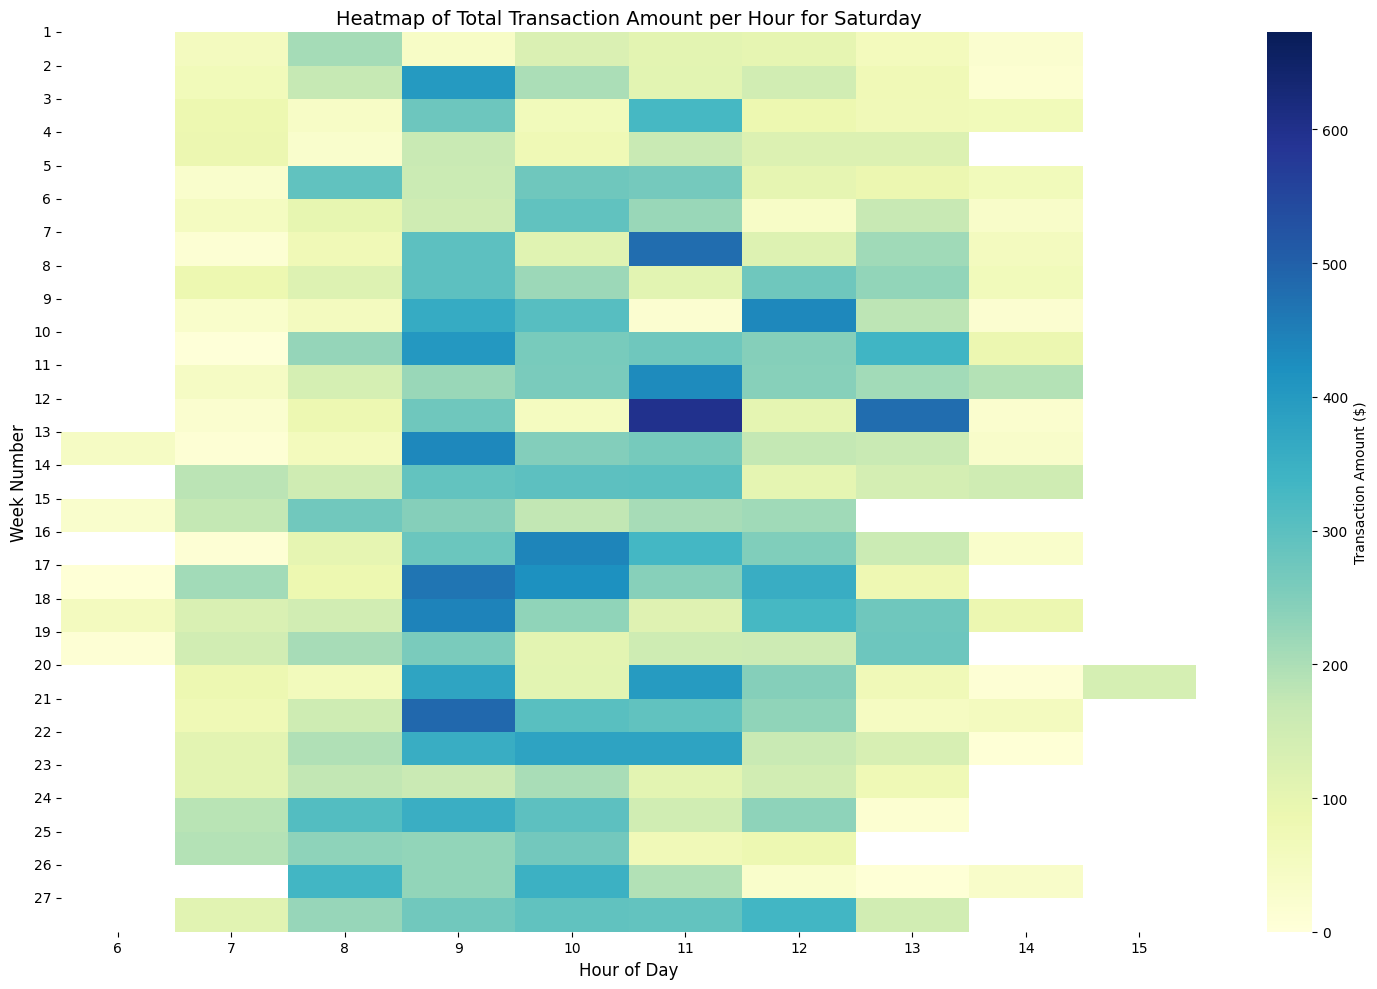

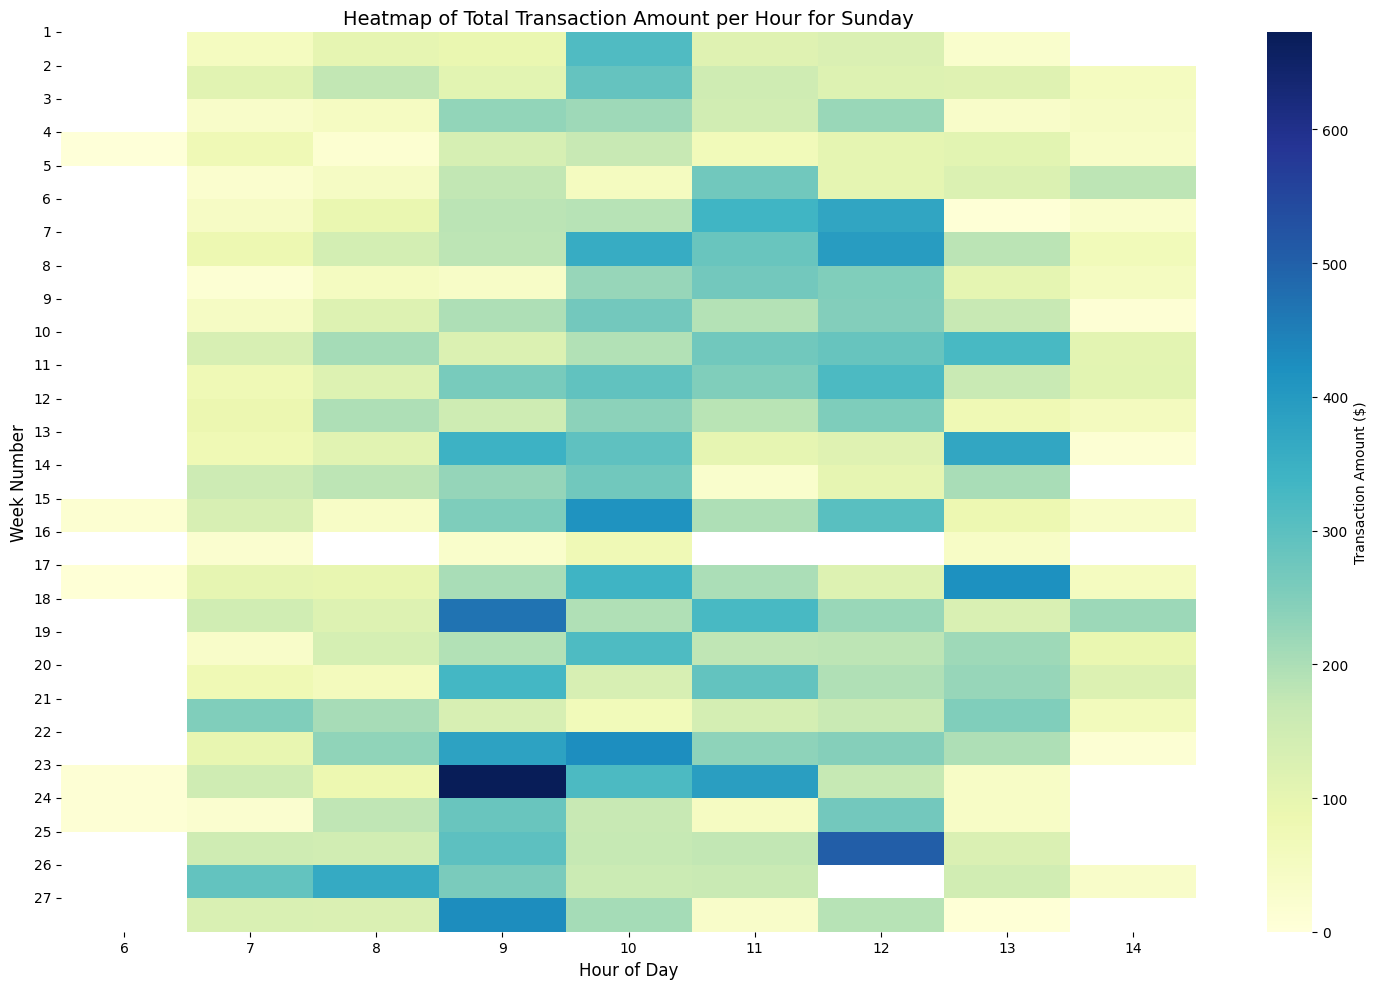

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Convert 'transacted_at' to datetime and set the correct timezone if needed
data['transacted_at'] = pd.to_datetime(data['transacted_at'])

# Extract the relevant features: week number, day of the week, and hour
data['week_number'] = data['transacted_at'].dt.isocalendar().week
data['day_of_week'] = data['transacted_at'].dt.dayofweek  # Monday=0, Sunday=6
data['hour_of_day'] = data['transacted_at'].dt.hour

# Group by week number, day of the week, and hour of the day, and calculate the total amount per group
data_grouped = data.groupby(['week_number', 'day_of_week', 'hour_of_day'])['paid_amount'].sum().reset_index()

# Define the day names for titles
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the global maximum transaction amount across all days and weeks
global_max_amount = data_grouped['paid_amount'].max()

# Loop through each day of the week (0=Monday, 6=Sunday) to create separate heatmaps
for day in range(7):
    # Filter the data for the current day
    day_data = data_grouped[data_grouped['day_of_week'] == day]
    
    # Pivot the data to get the total amount for each hour of the day across all weeks
    day_data_pivot = day_data.pivot(index='week_number', columns='hour_of_day', values='paid_amount')
    
    # Create a separate plot for each day of the week
    plt.figure(figsize=(15, 10))  # Expand the figure to accommodate all weeks clearly
    
    # Plot the heatmap for each day with color scale from low to high
    sns.heatmap(day_data_pivot, cmap="YlGnBu", cbar_kws={'label': 'Transaction Amount ($)'},
                annot=False, cbar=True, vmin=0, vmax=global_max_amount)
    
    # Set plot title with correct day name
    plt.title(f'Heatmap of Total Transaction Amount per Hour for {days_of_week[day]}', fontsize=14)
    plt.ylabel('Week Number', fontsize=12)
    plt.xlabel('Hour of Day', fontsize=12)
    
    # Adjust y-axis labels to just show numbers 1 to 29
    plt.yticks(ticks=range(len(day_data_pivot)), labels=range(1, len(day_data_pivot) + 1), rotation=0)
    
    # Adjust the layout to make sure everything fits and is readable
    plt.tight_layout()
    plt.show()


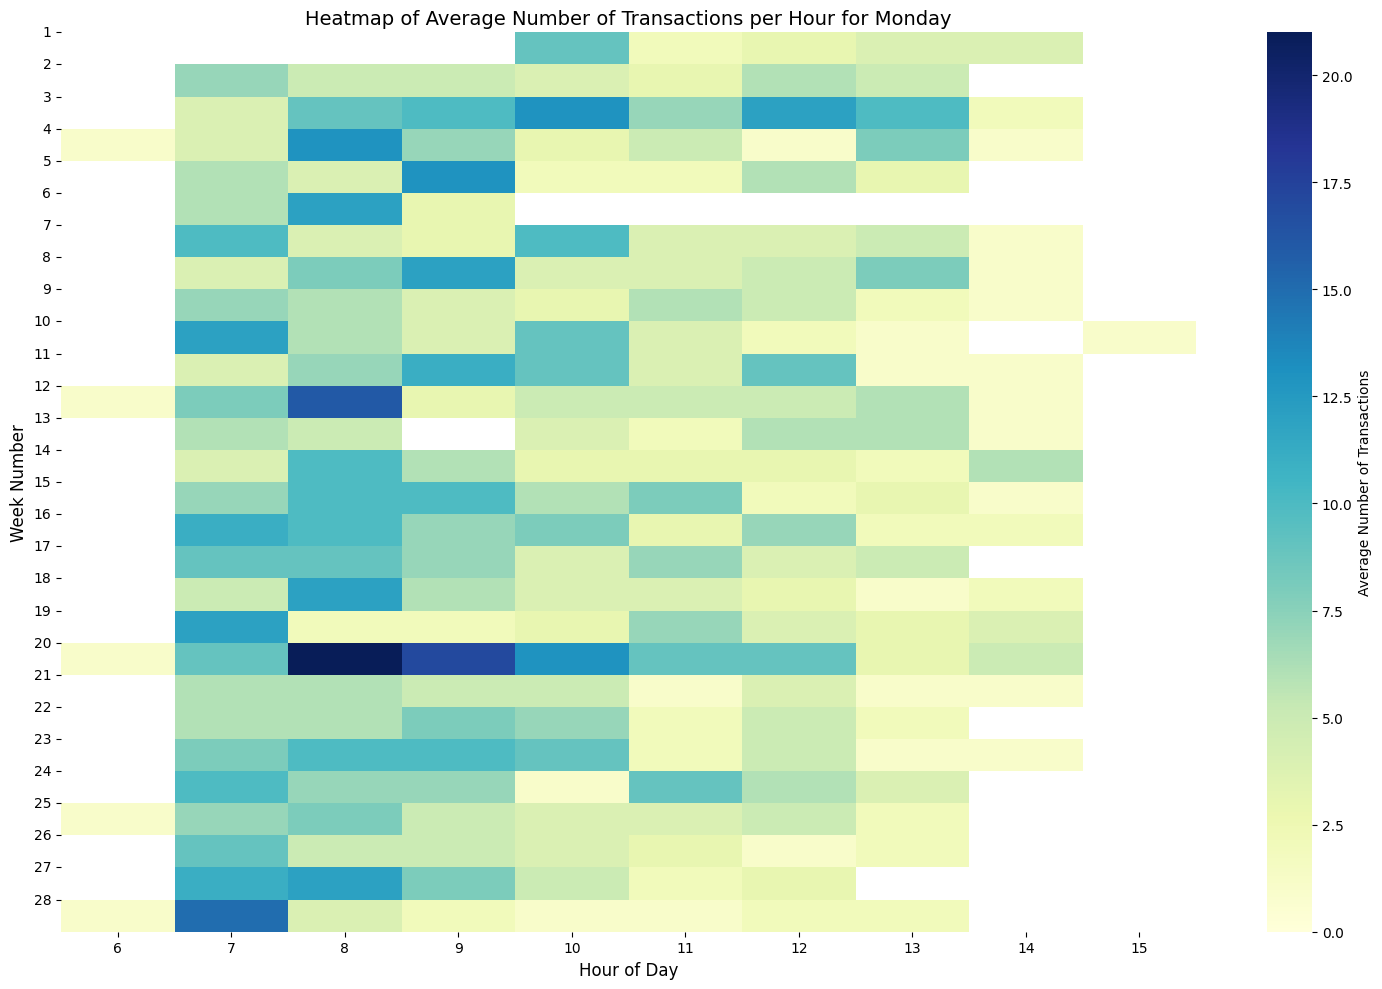

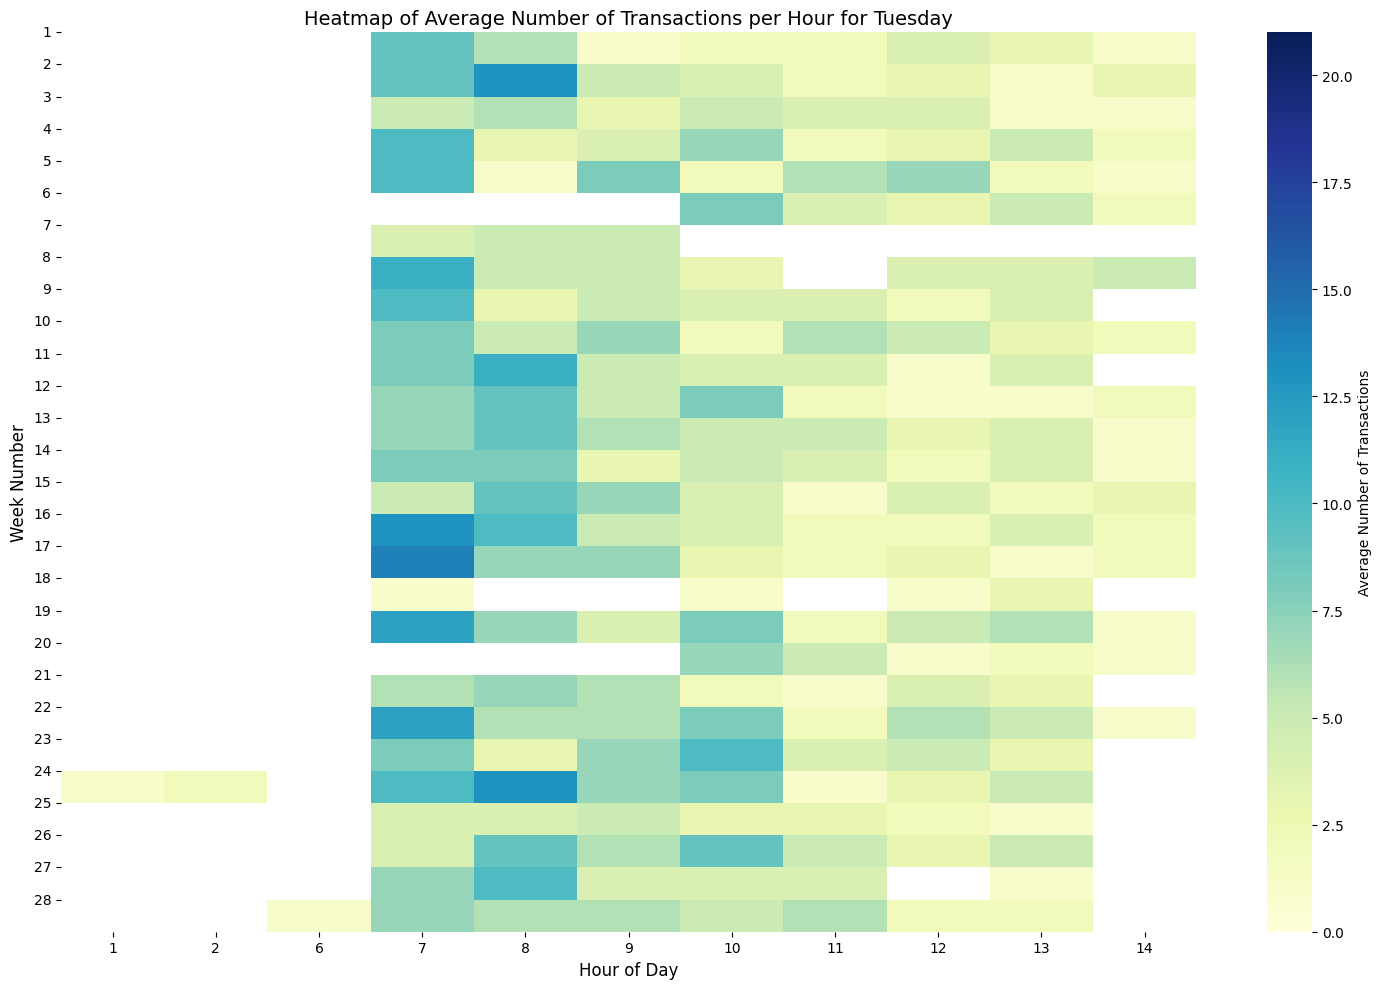

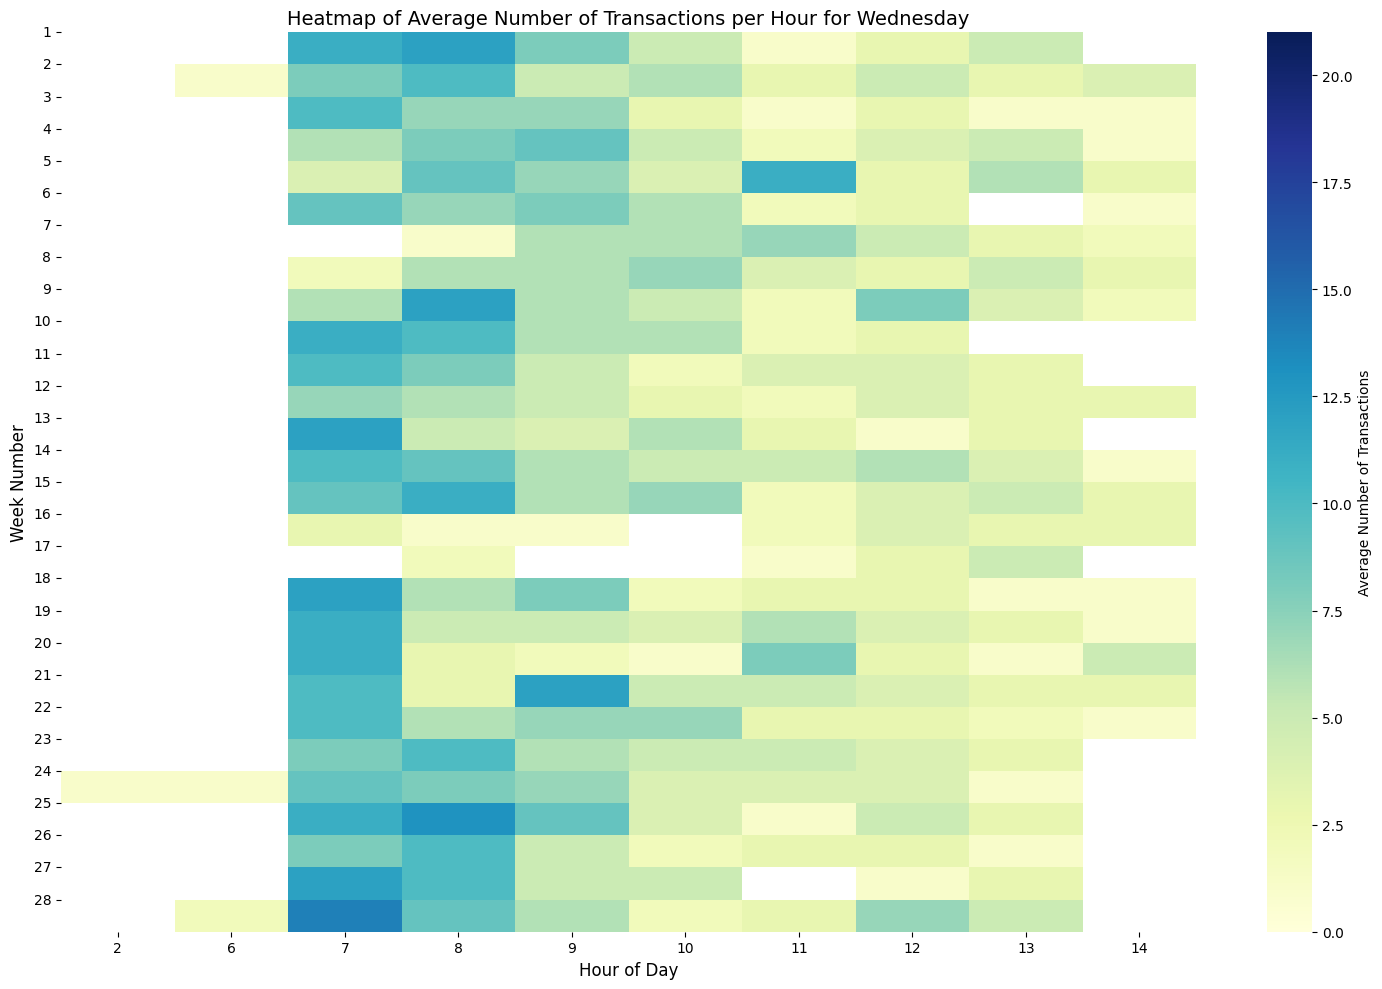

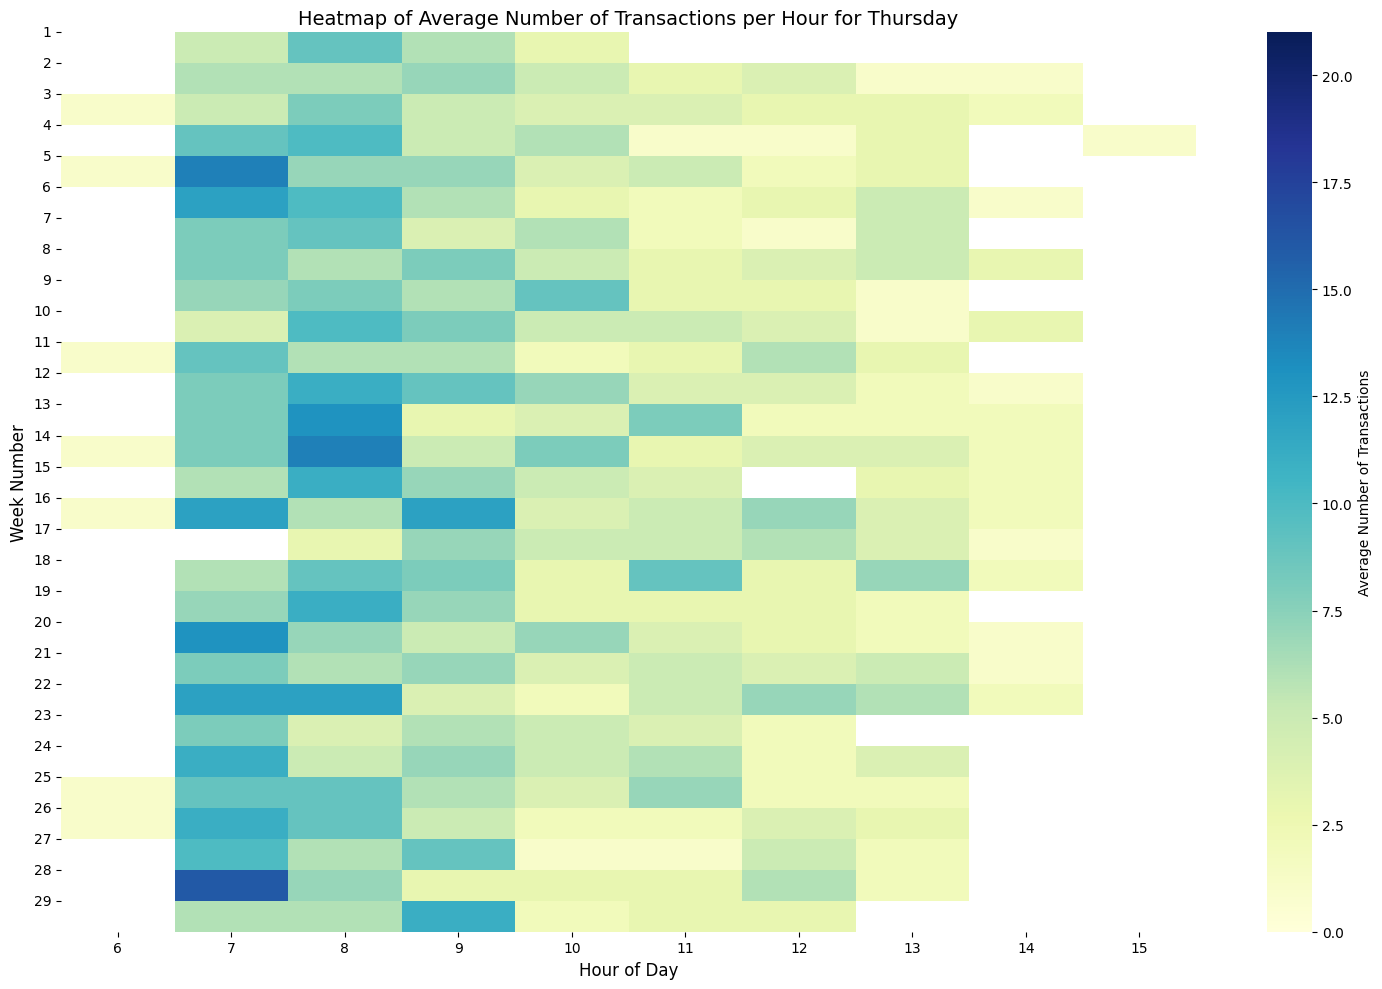

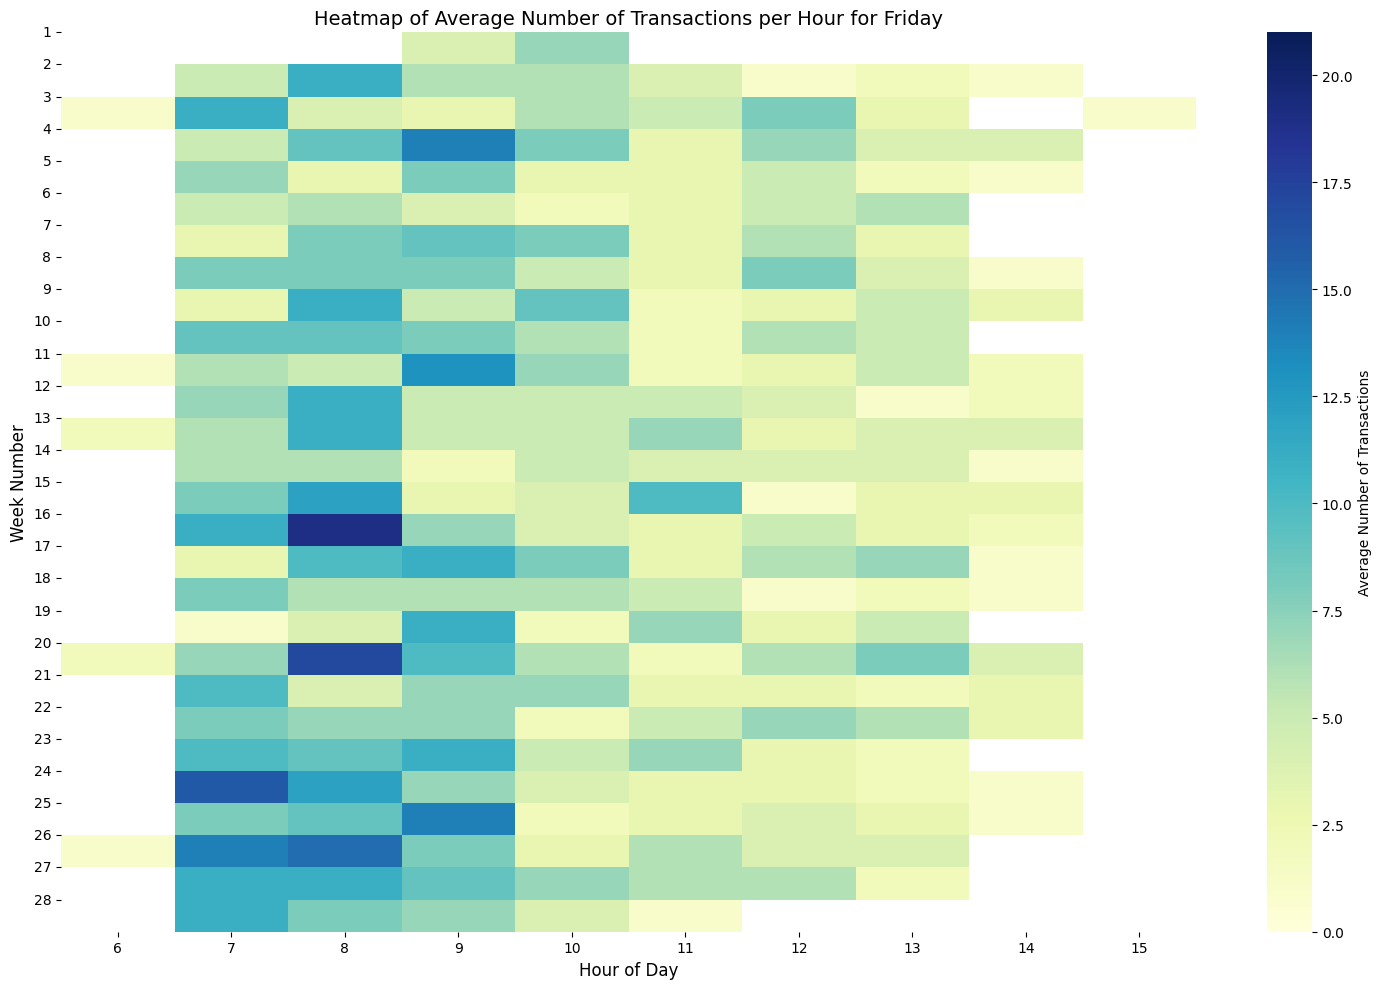

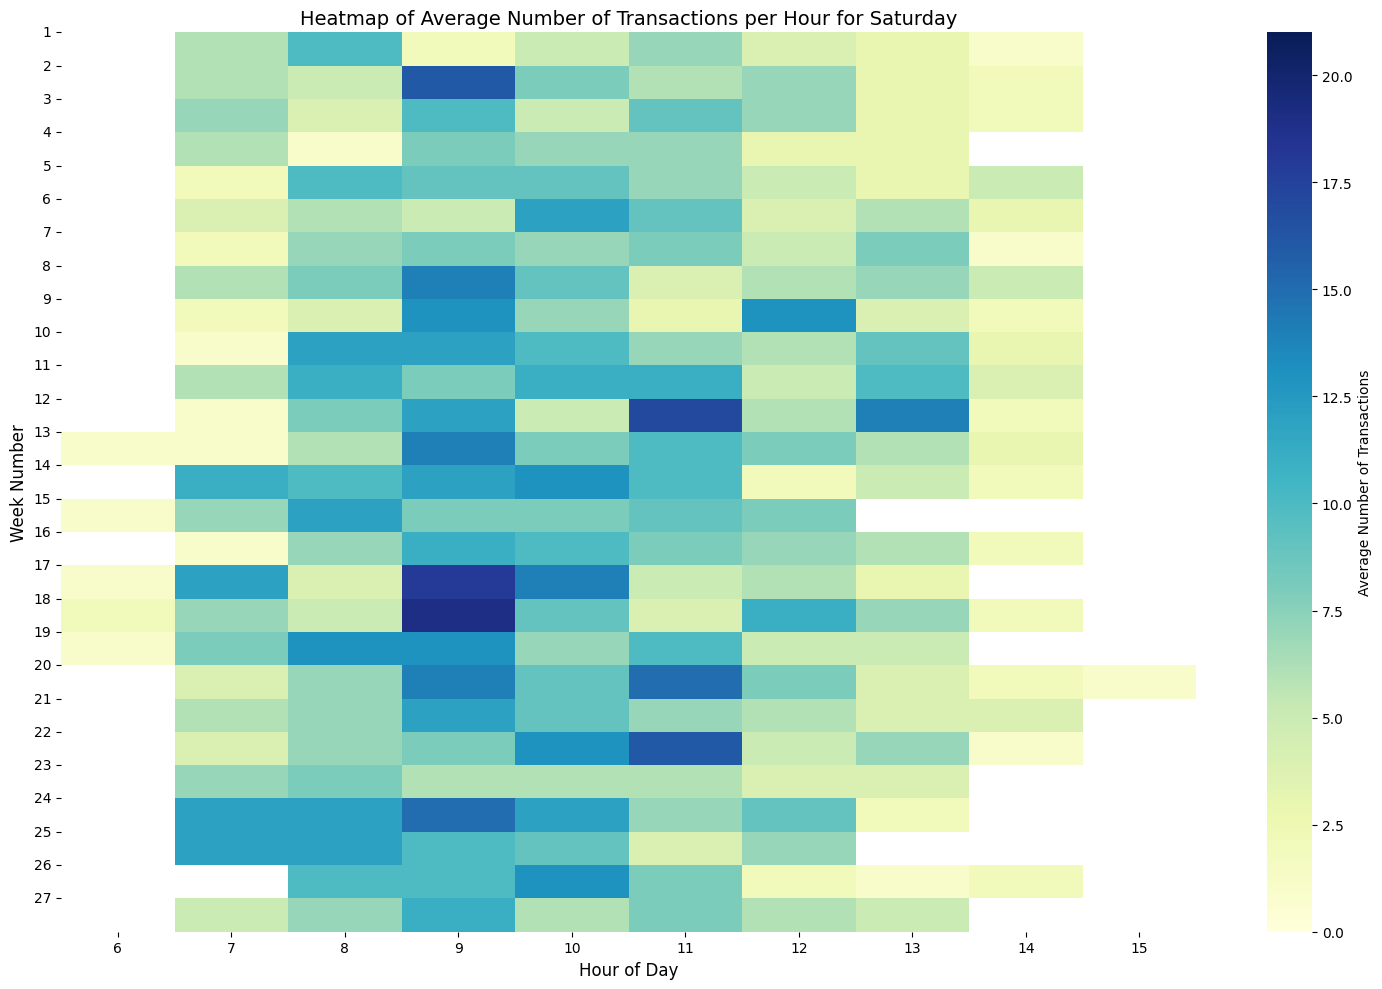

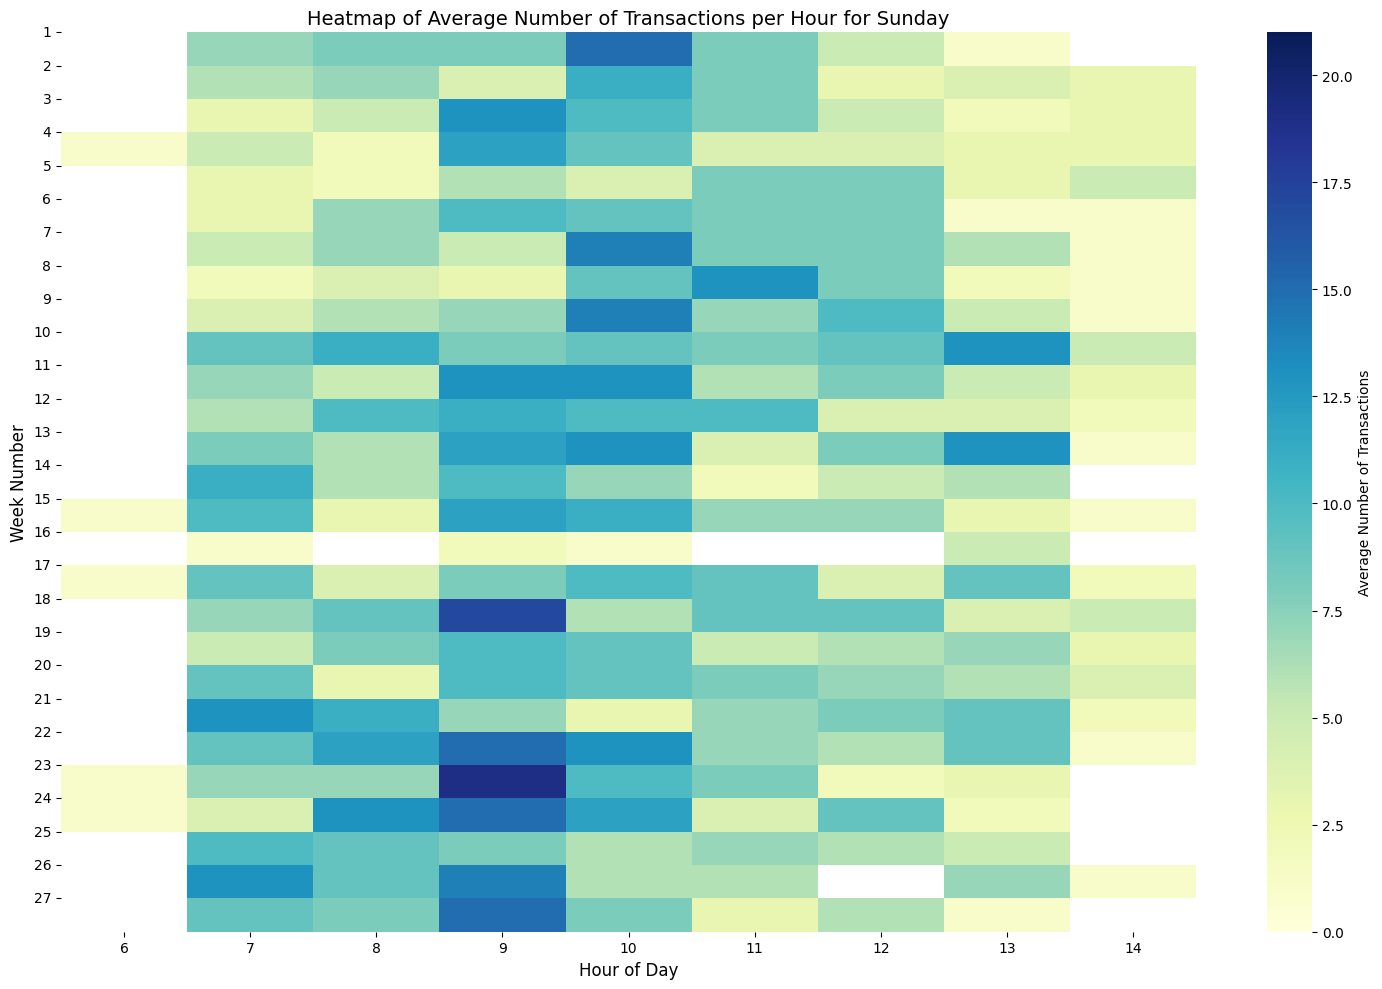

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Convert 'transacted_at' to datetime and set the correct timezone if needed
data['transacted_at'] = pd.to_datetime(data['transacted_at'])

# Extract the relevant features: week number, day of the week, and hour
data['week_number'] = data['transacted_at'].dt.isocalendar().week
data['day_of_week'] = data['transacted_at'].dt.dayofweek  # Monday=0, Sunday=6
data['hour_of_day'] = data['transacted_at'].dt.hour

# Group by week number, day of the week, and hour of the day, and calculate the count of transactions
data_grouped = data.groupby(['week_number', 'day_of_week', 'hour_of_day']).size().reset_index(name='transaction_count')

# Define the day names for titles
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate the global maximum number of transactions across all days and weeks
global_max_transactions = data_grouped['transaction_count'].max()

# Loop through each day of the week (0=Monday, 6=Sunday) to create separate heatmaps
for day in range(7):
    # Filter the data for the current day
    day_data = data_grouped[data_grouped['day_of_week'] == day]
    
    # Pivot the data to get the transaction count for each hour of the day across all weeks
    day_data_pivot = day_data.pivot(index='week_number', columns='hour_of_day', values='transaction_count')
    
    # Create a separate plot for each day of the week
    plt.figure(figsize=(15, 10))  # Expand the figure to accommodate all weeks clearly
    
    # Plot the heatmap for each day with color scale from low to high
    sns.heatmap(day_data_pivot, cmap="YlGnBu", cbar_kws={'label': 'Average Number of Transactions'},
                annot=False, cbar=True, vmin=0, vmax=global_max_transactions)
    
    # Set plot title with correct day name
    plt.title(f'Heatmap of Average Number of Transactions per Hour for {days_of_week[day]}', fontsize=14)
    plt.ylabel('Week Number', fontsize=12)
    plt.xlabel('Hour of Day', fontsize=12)
    
    # Adjust y-axis labels to just show numbers 1 to 29
    plt.yticks(ticks=range(len(day_data_pivot)), labels=range(1, len(day_data_pivot) + 1), rotation=0)
    
    # Adjust the layout to make sure everything fits and is readable
    plt.tight_layout()
    plt.show()


/var/folders/62/_fzs_d452mv3jyvpgg6zsmn00000gn/T/ipykernel_50758/2009362973.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='visit_range', data=cohort_df, palette='viridis')


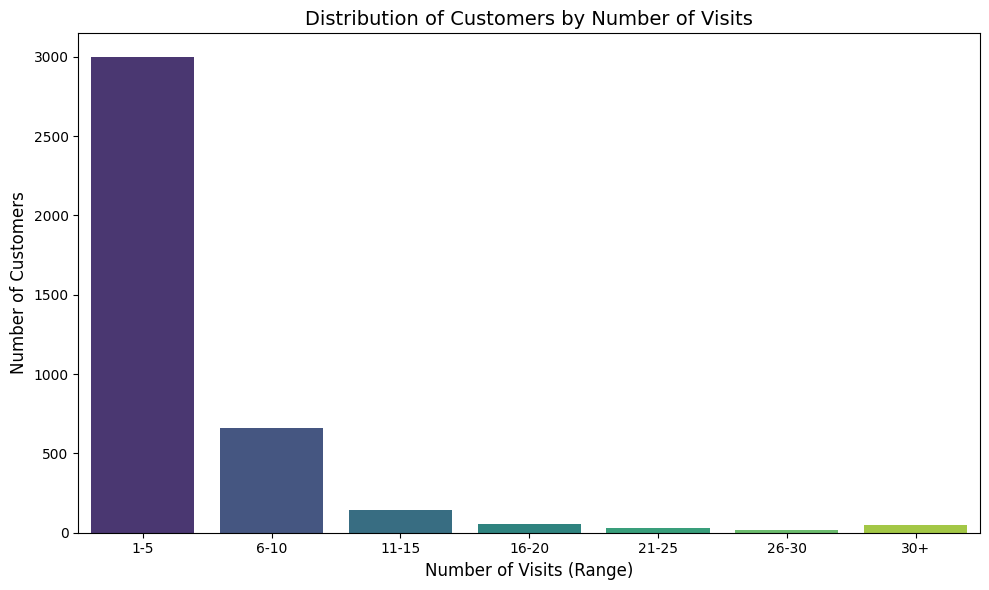

/var/folders/62/_fzs_d452mv3jyvpgg6zsmn00000gn/T/ipykernel_50758/2009362973.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='amount_range', data=cohort_df, palette='viridis')


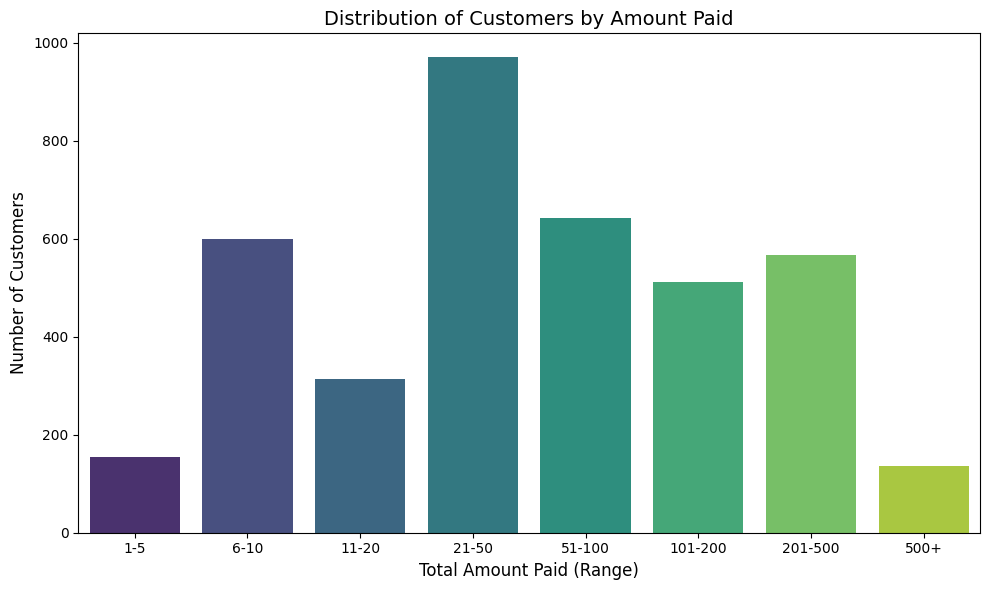

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' and 'product_df' are your DataFrames
# Convert 'transacted_at' to datetime and extract 'day_of_week'
data['transacted_at'] = pd.to_datetime(data['transacted_at'])
data['day_of_week'] = data['transacted_at'].dt.dayofweek  # Monday=0, Sunday=6

# Join 'data' and 'product_df' on 'id' to associate products with each transaction
merged_df = pd.merge(data, product_df, on='id', how='left')

# 1. Group Customers by Range of Number of Visits
# Group by customer_id and day_of_week, then count the number of visits
customer_day_of_week = merged_df.groupby(['customer_id', 'day_of_week']).size().reset_index(name='visit_count')

# Calculate total visits for each customer
customer_total_visits = customer_day_of_week.groupby('customer_id')['visit_count'].sum().reset_index(name='total_visits')

# Define custom bins for the number of visits (e.g., 1-5, 6-10, 11-15 visits)
visit_bins = [0, 5, 10, 15, 20, 25, 30, 100]  # Add more bins as needed
visit_labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+']
customer_total_visits['visit_range'] = pd.cut(customer_total_visits['total_visits'], bins=visit_bins, labels=visit_labels, right=False)

# 2. Group Customers by Range of Total Amount Paid
# Sum the total amount paid by each customer
customer_total_paid = merged_df.groupby('customer_id')['paid_amount'].sum().reset_index(name='total_paid')

# Define custom bins for the total amount paid (e.g., 1-5, 6-10, 11-20 dollars)
amount_bins = [0, 5, 10, 20, 50, 100, 200, 500, 1000]  # Adjust the bins as needed
amount_labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '101-200', '201-500', '500+']
customer_total_paid['amount_range'] = pd.cut(customer_total_paid['total_paid'], bins=amount_bins, labels=amount_labels, right=False)

# Merge both visit and amount range data
cohort_df = pd.merge(customer_total_visits, customer_total_paid, on='customer_id')

# 3. Plot the Distribution of Customers by Visit Range
plt.figure(figsize=(10, 6))
sns.countplot(x='visit_range', data=cohort_df, palette='viridis')
plt.title('Distribution of Customers by Number of Visits', fontsize=14)
plt.xlabel('Number of Visits (Range)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Plot the Distribution of Customers by Amount Paid Range
plt.figure(figsize=(10, 6))
sns.countplot(x='amount_range', data=cohort_df, palette='viridis')
plt.title('Distribution of Customers by Amount Paid', fontsize=14)
plt.xlabel('Total Amount Paid (Range)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.tight_layout()
plt.show()




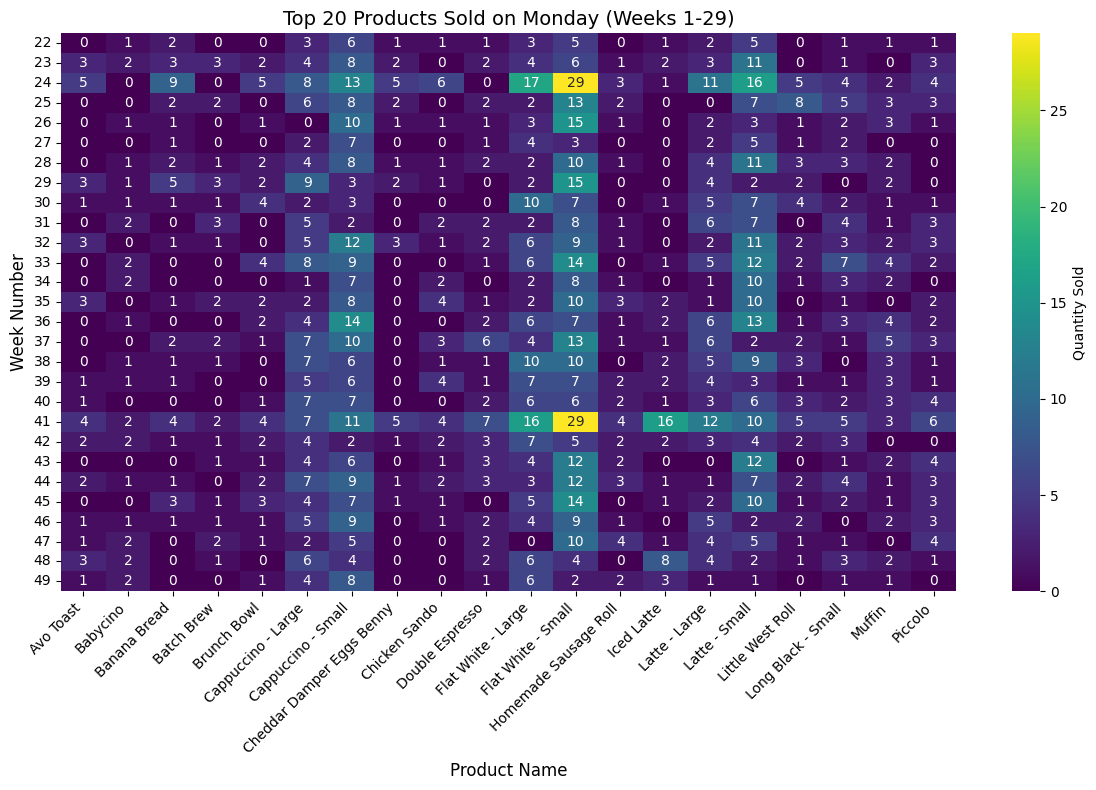

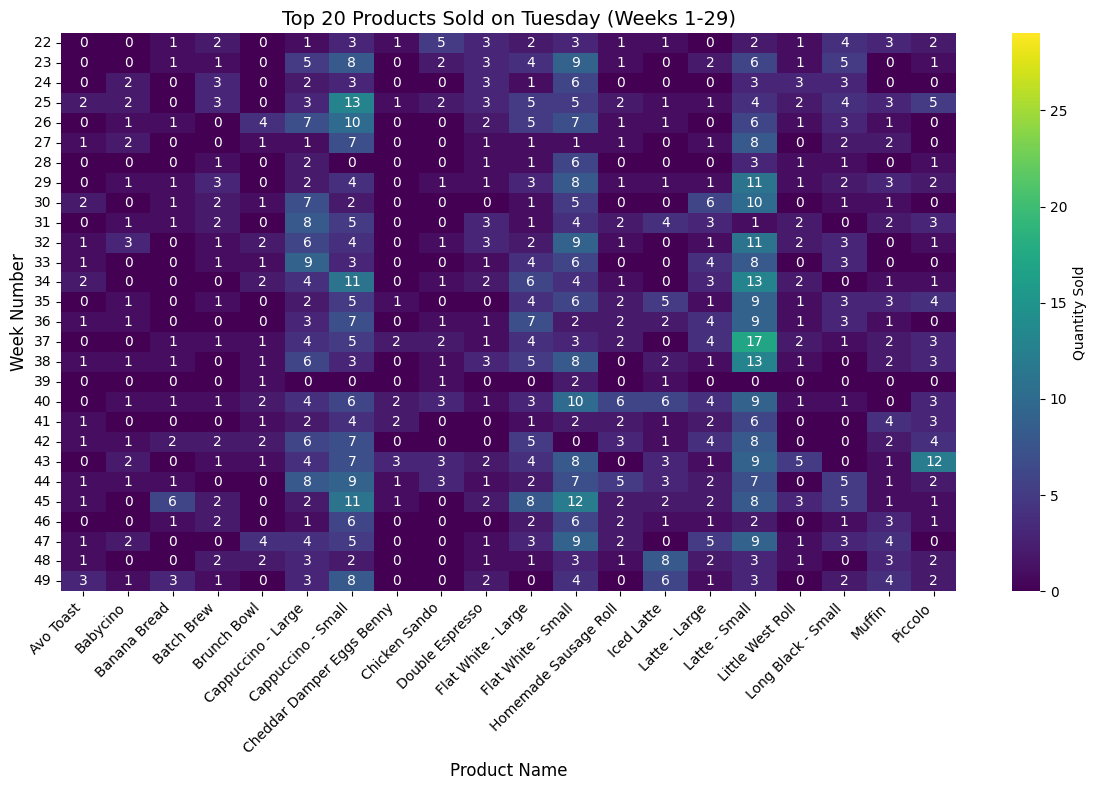

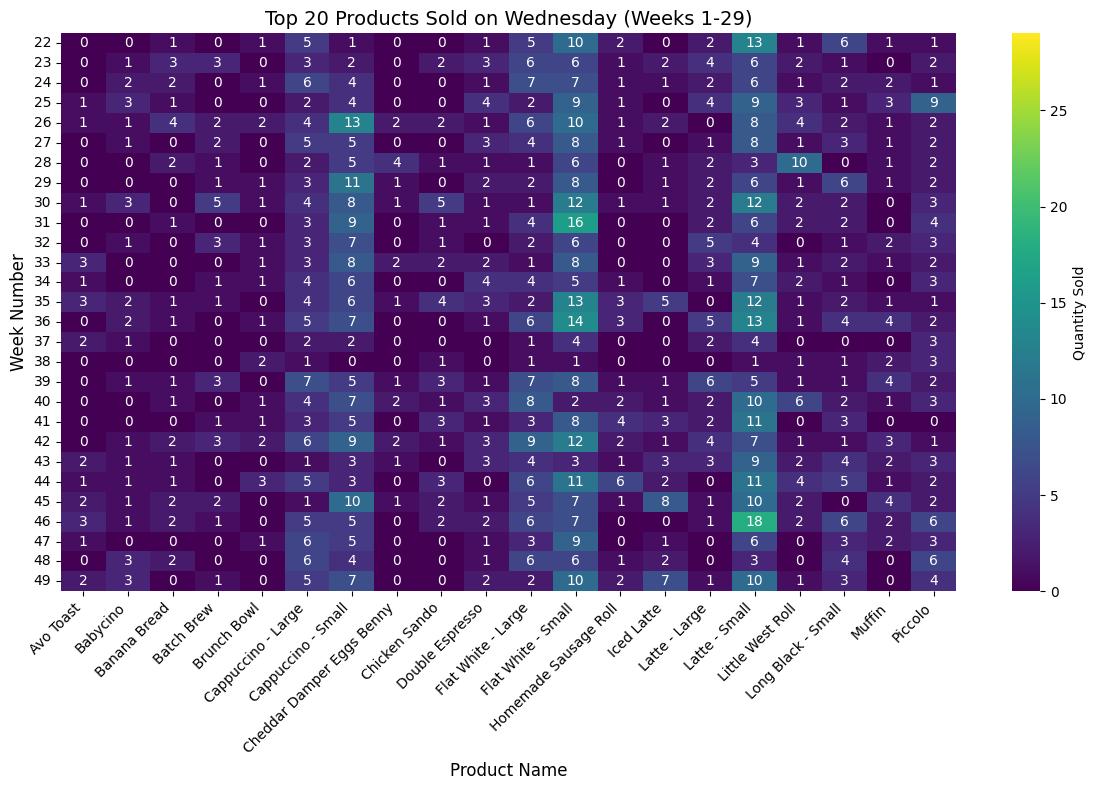

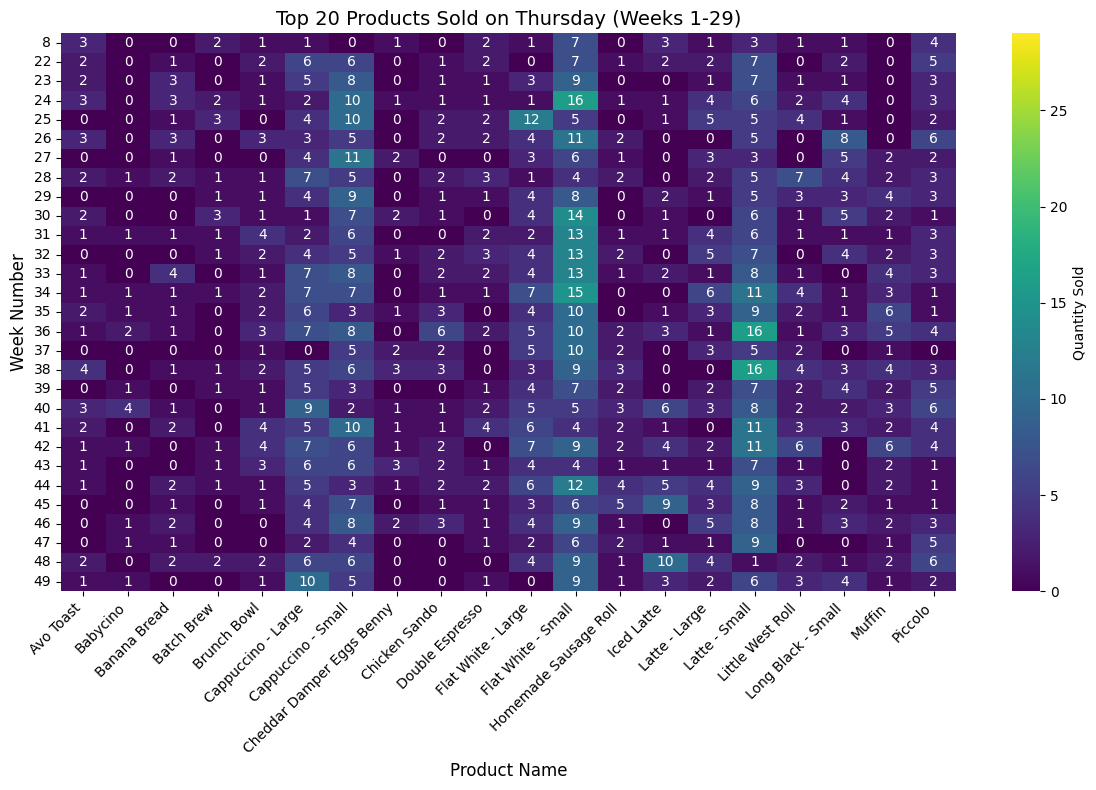

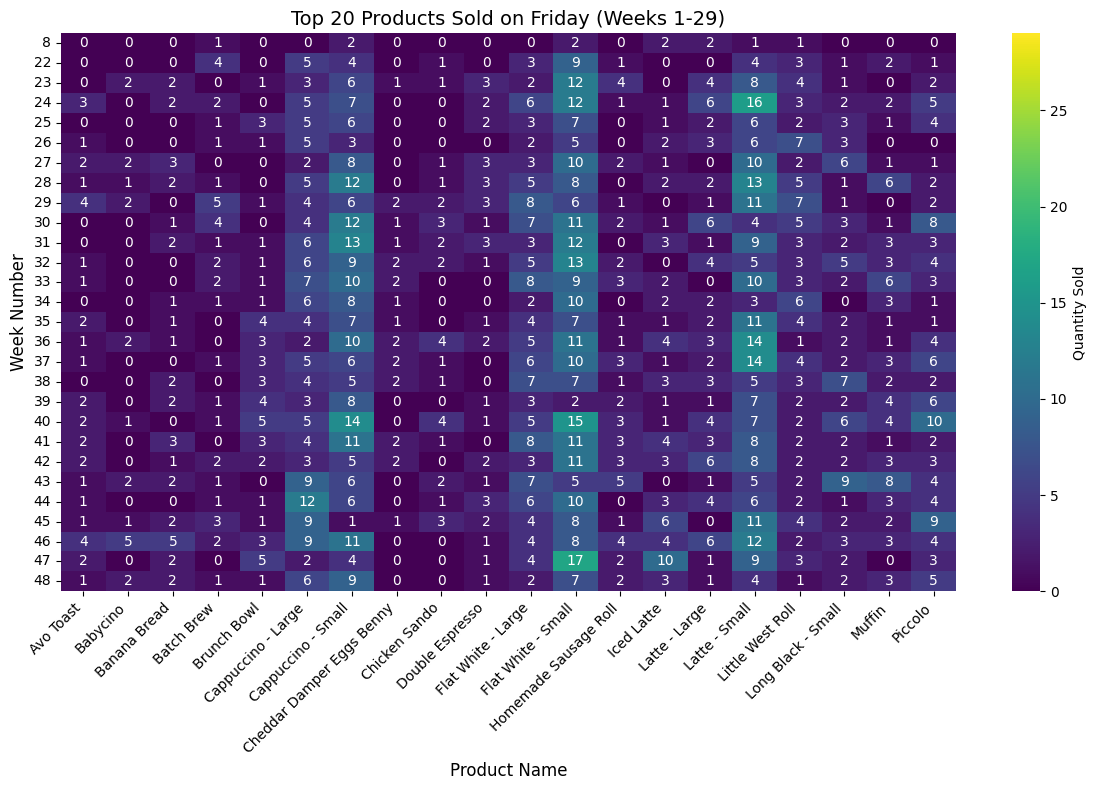

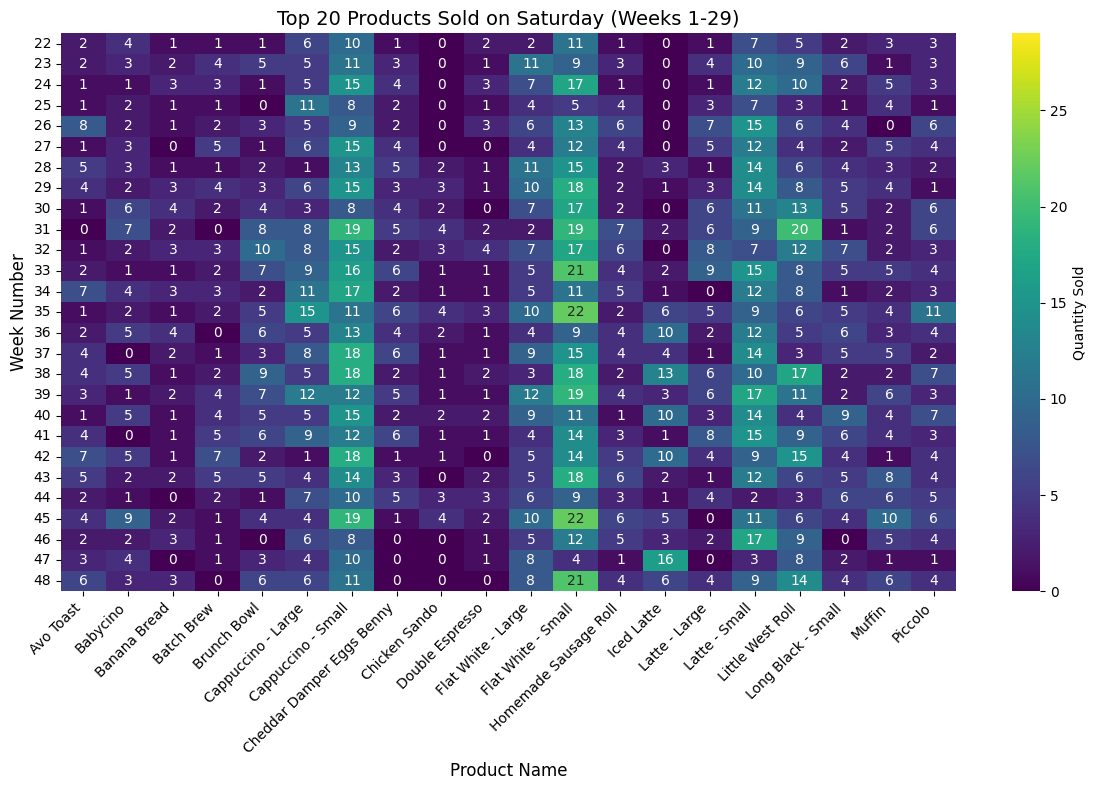

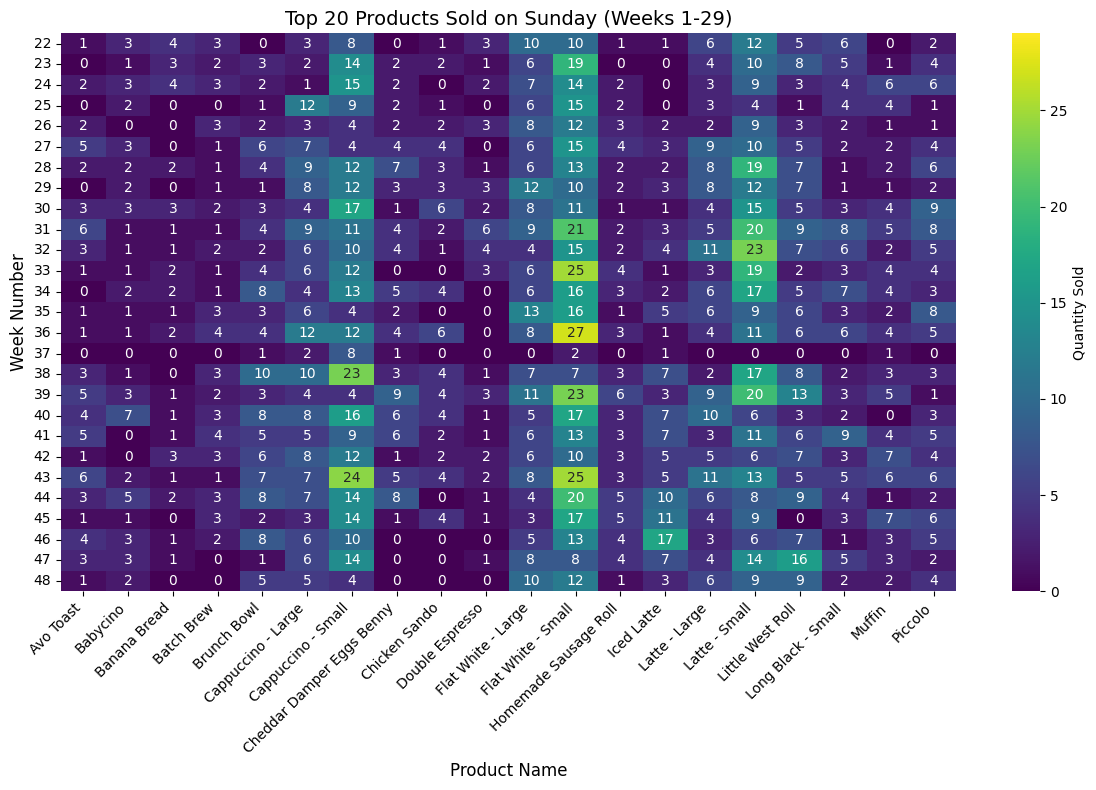

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
data['transacted_at'] = pd.to_datetime(data['transacted_at'])
data['day_of_week'] = data['transacted_at'].dt.dayofweek  # Monday=0, Sunday=6
data['week_number'] = data['transacted_at'].dt.isocalendar().week  # Week number

# Join the datasets
merged_df = pd.merge(data, product_df, on='id', how='left')

# Find the top 20 products of all time
top_products_all_time = (
    merged_df.groupby('product_name')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .index
)

# Filter data to only include top 20 products
filtered_data = merged_df[merged_df['product_name'].isin(top_products_all_time)]

# Group data by week, day, and product to calculate total quantities sold
weekly_product_sales = (
    filtered_data.groupby(['week_number', 'day_of_week', 'product_name'])['quantity']
    .sum()
    .reset_index()
)

# Replace day_of_week numbers with names
day_of_week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekly_product_sales['day_of_week'] = weekly_product_sales['day_of_week'].map(day_of_week_mapping)

# Set consistent color scale for heatmaps
max_quantity = weekly_product_sales['quantity'].max()

# Create one plot for each day of the week
for day in day_of_week_mapping.values():
    day_data = weekly_product_sales[weekly_product_sales['day_of_week'] == day]
    pivot_table = day_data.pivot_table(
        index='week_number',
        columns='product_name',
        values='quantity',
        aggfunc='sum',
        fill_value=0
    )
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        data=pivot_table,
        cmap='viridis',
        vmin=0,
        vmax=max_quantity,  # Use the same color scale for all plots
        annot=True,
        fmt='.0f',
        cbar_kws={'label': 'Quantity Sold'}
    )
    plt.title(f"Top 20 Products Sold on {day} (Weeks 1-29)", fontsize=14)
    plt.xlabel("Product Name", fontsize=12)
    plt.ylabel("Week Number", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
